In [1]:
%matplotlib inline
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.append("C:\\Users\\konar\\IdeaProjects\\lobSimulations")#
#sys.path.append("/home/konajain/code/lobSimulations")
from src.data.dataLoader import dataLoader #, fit, inference, simulate
import numpy as np
import time
import pickle
import statsmodels.api as sm


In [2]:
stocks = ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT','AAPL','ABBV', 'PM','IBM','TSLA','CHTR','AMZN', 'GOOG', 'BKNG']

# Example

demo_erg_Mmed_40


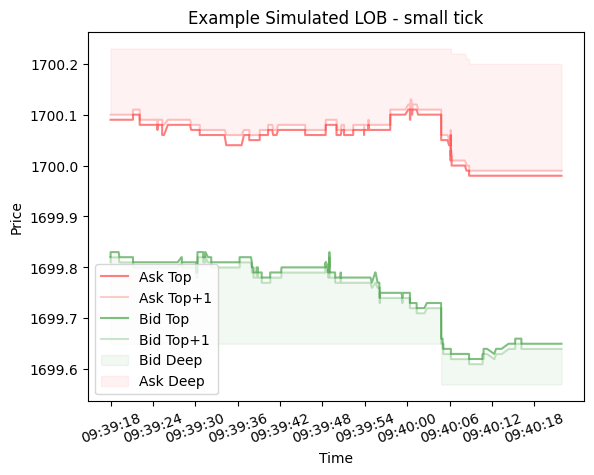

In [2]:
path = 'D:\\PhD\\results - small tick\\sim'
fnames = os.listdir(path)  
fname = fnames[20]
print(fname)
with open(path+'\\'+fname, 'rb') as f:
    T, lob = pickle.load(f)

ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob[8000:9000]:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.array(T[8000:9000])[:,1]
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5, label = 'Ask Top')
ax.plot(t, ask_d, color="r", alpha = 0.2, label = 'Ask Top+1')
# ax.plot(t, ask_m_D, color="purple", alpha = 0.2, label = 'Ask Deepm')
ax.plot(t, bid_t, color="g", alpha =0.5, label = 'Bid Top')
ax.plot(t, bid_d, color="g", alpha = 0.2, label = 'Bid Top+1')
# ax.plot(t, bid_m_D, color="cyan", alpha = 0.2, label = 'Bid Deep')
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05 , label = 'Bid Deep')
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05, label = 'Ask Deep')
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
# ax.set_xlim(min(t)+3000, min(t)+4000)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend(loc='lower left')
ax.set_title('Example Simulated LOB - small tick')
plt.savefig('D:\\PhD\\results - small tick\\example.png')
plt.show()

# Rough

In [9]:
T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose= False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3251714528.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose= False)
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3251714528.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_di

initial spread:  1.099999999999909 



In [10]:
lob[0]

{'mid': 1700,
 'Ask_touch': (np.float64(1700.55), np.int64(37)),
 'Bid_touch': (np.float64(1699.45), np.int64(427)),
 'Ask_m_T': np.int64(17),
 'Ask_m_D': np.int64(2),
 'Bid_m_T': np.int64(2),
 'Bid_m_D': np.int64(2),
 'Ask_deep': (np.float64(1700.72), np.int64(178)),
 'Bid_deep': (np.float64(1699.43), np.int64(84))}

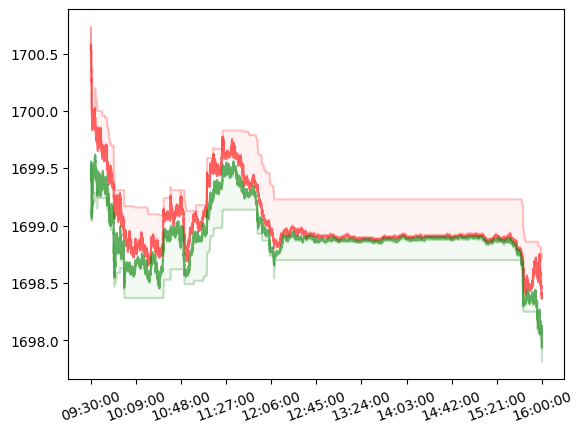

In [11]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

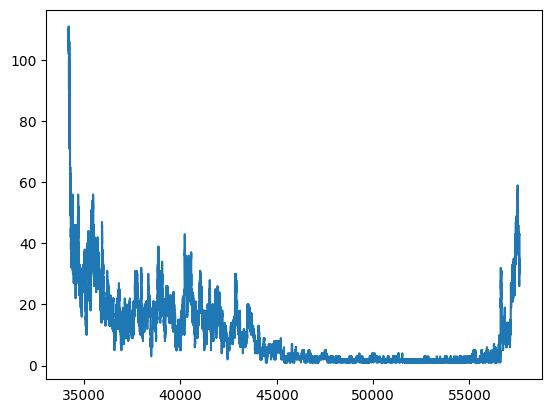

In [12]:
plt.plot(t, spread)

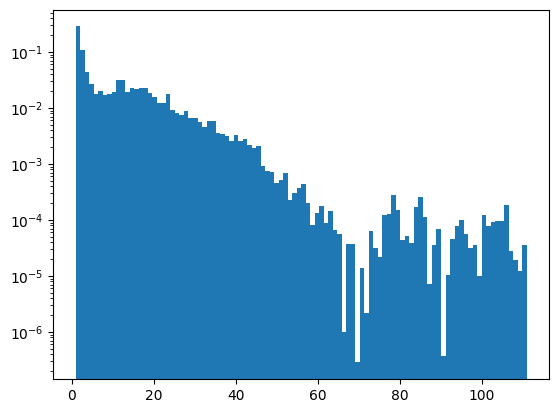

In [22]:
plt.hist(spread[1:], weights = np.diff(t), density=True,bins=100)
plt.yscale('log')
# plt.xscale('log')

In [14]:
len(spread)

245607

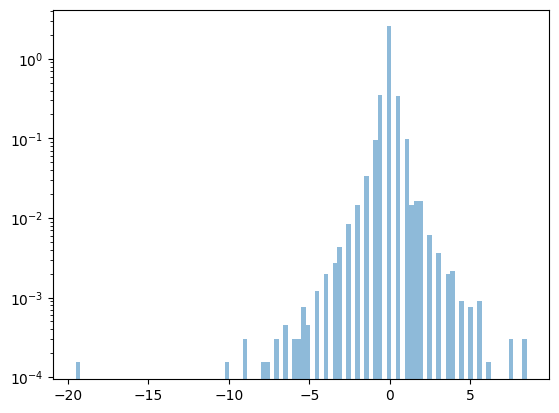

In [24]:
mid = (np.array(ask_t) + np.array(bid_t))/2
tau = 1
max_t = np.round(max(np.array(t) - 34200), decimals=0)
sample_x = np.linspace(0, max_t, int(max_t/tau))
idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
sample_y = mid[idxs]
rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
plt.hist(rets*100, bins = 100, alpha = 0.5, density = True)
plt.yscale('log')
plt.show()

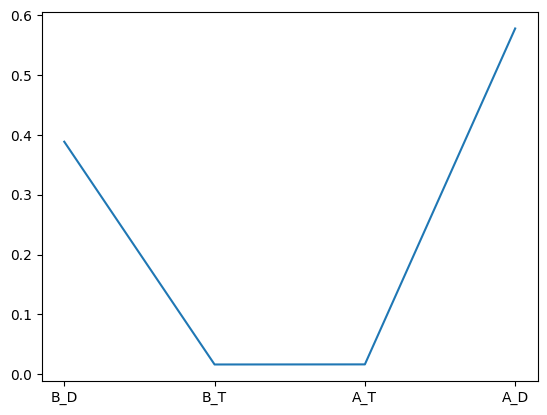

In [43]:
q_ask_t = []
q_bid_t = []
q_ask_d = []
q_bid_d= []
for r in lob:
    q_ask_t.append(r['Ask_touch'][1])
    q_bid_t.append(r['Bid_touch'][1])
    q_ask_d.append(r['Ask_deep'][1])
    q_bid_d.append(r['Bid_deep'][1])
Q= np.array([q_bid_d, q_bid_t, q_ask_t, q_ask_d])
Q = np.multiply(Q,(1./Q.sum(axis=0)))
Q_shape = Q.sum(axis=1)
Q_shape =Q_shape/Q_shape.sum()
plt.plot(['B_D', 'B_T', 'A_T', 'A_D'],Q_shape)


In [44]:
# Large tick:

In [53]:
T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 4, price0 = 45, M_med = 50, verbose= False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3615856382.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 4, price0 = 45, M_med = 50, verbose= False)
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3615856382.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_sy

initial spread:  0.04000000000000625 



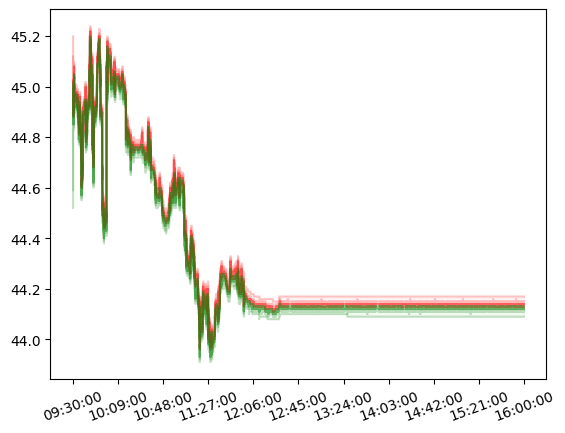

In [48]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

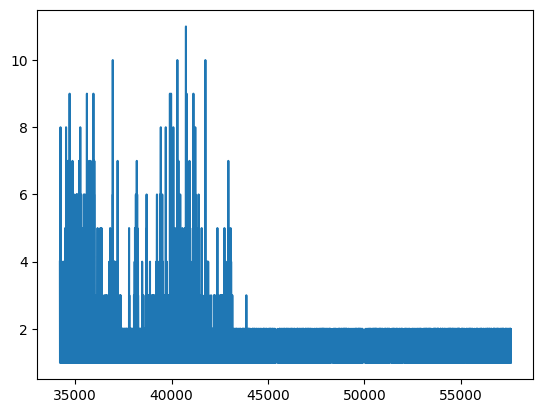

In [52]:
plt.plot(t, spread)

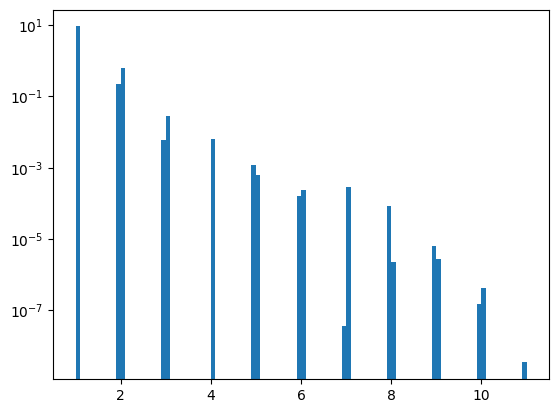

In [49]:
plt.hist(spread[1:], weights = np.diff(t), density=True,bins=100)
plt.yscale('log')
# plt.xscale('log')

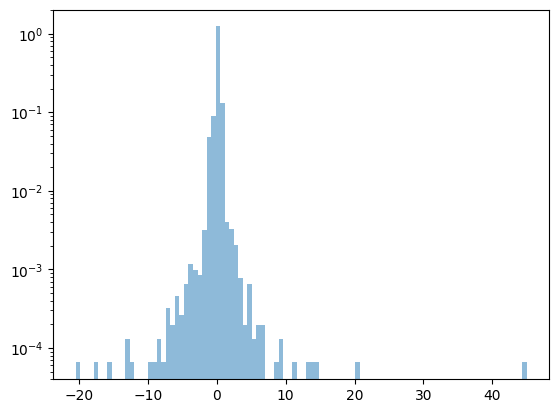

In [50]:
mid = (np.array(ask_t) + np.array(bid_t))/2
tau = 1
max_t = np.round(max(np.array(t) - 34200), decimals=0)
sample_x = np.linspace(0, max_t, int(max_t/tau))
idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
sample_y = mid[idxs]
rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
plt.hist(rets*100, bins = 100, alpha = 0.5, density = True)
plt.yscale('log')
plt.show()

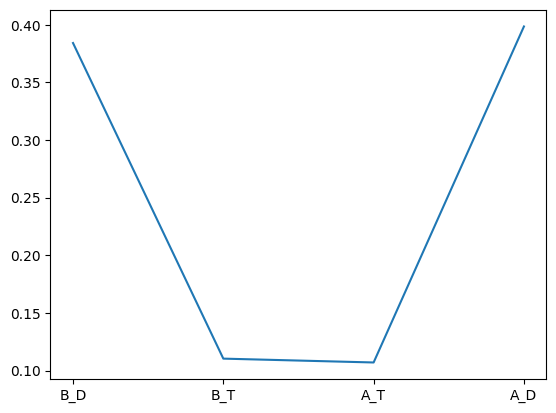

In [51]:
q_ask_t = []
q_bid_t = []
q_ask_d = []
q_bid_d= []
for r in lob:
    q_ask_t.append(r['Ask_touch'][1])
    q_bid_t.append(r['Bid_touch'][1])
    q_ask_d.append(r['Ask_deep'][1])
    q_bid_d.append(r['Bid_deep'][1])
Q= np.array([q_bid_d, q_bid_t, q_ask_t, q_ask_d])
Q = np.multiply(Q,(1./Q.sum(axis=0)))
Q_shape = Q.sum(axis=1)
Q_shape =Q_shape/Q_shape.sum()
plt.plot(['B_D', 'B_T', 'A_T', 'A_D'],Q_shape)


# Comparisons

In [91]:
path = '/SAN/fca/Konark_PhD_Experiments/simulated/smallTick/'
fnames = os.listdir(path)       

## spr0

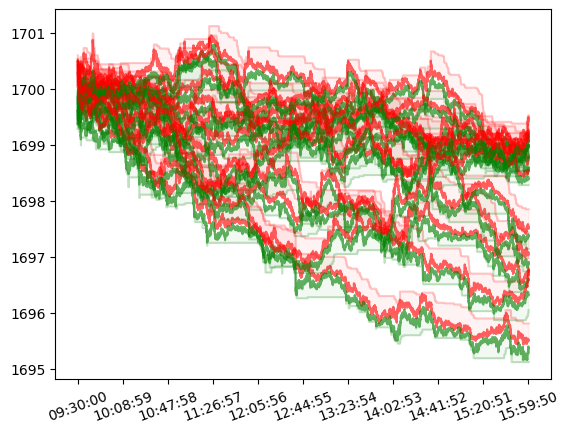

In [95]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_spr0_' in fname:
        with open(path+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, 'Spread Distribution - various initial spread')

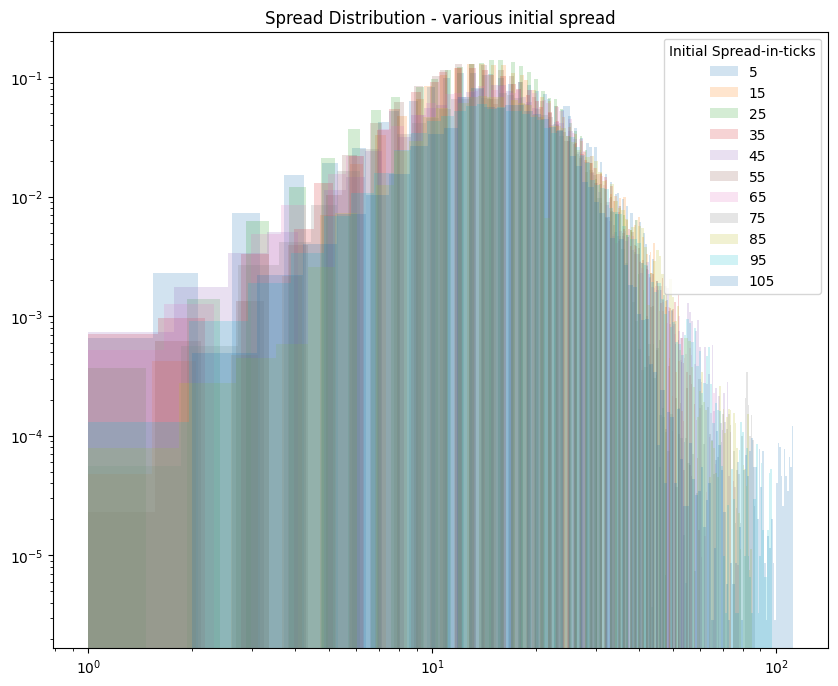

In [119]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(spreads, labels), key = lambda x: int(x[1])):
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.2)
plt.legend(loc='upper right', title = 'Initial Spread-in-ticks')
plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution - various initial spread')

Text(0, 0.5, 'Spread In Ticks')

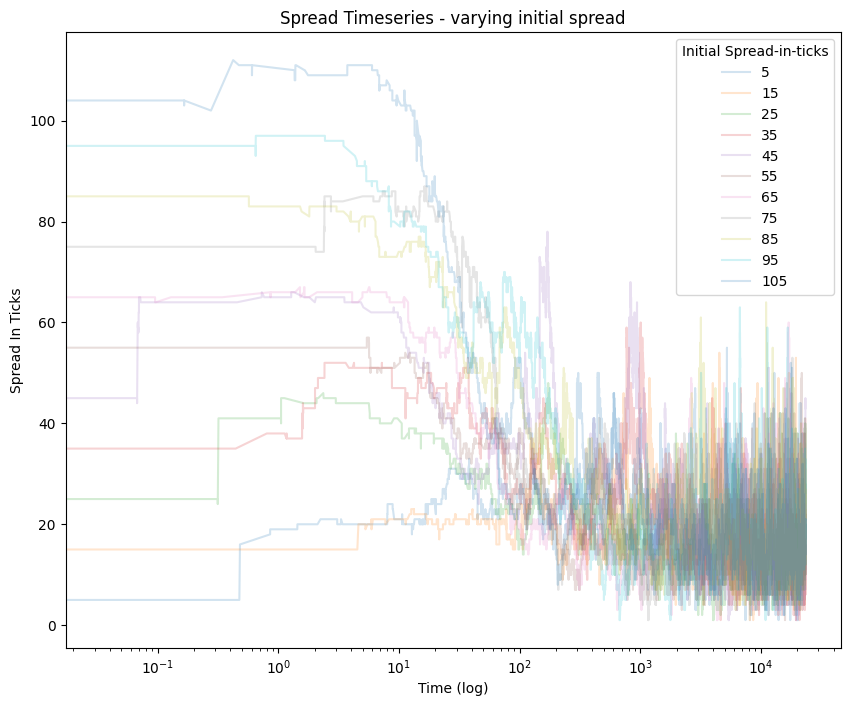

In [121]:
plt.figure(figsize=(10,8))
spreads = []
labels = []
for fname in sorted(fnames, key = lambda x: float(x.split('_')[-1])) :
    if '_spr0_' in fname:
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) #+ 9.5*3600
        plt.plot(t,spread, label=fname.split('_')[-1], alpha= 0.2)
plt.legend(loc='upper right', title= 'Initial Spread-in-ticks')
plt.xscale('log')
plt.title('Spread Timeseries - varying initial spread')
plt.xlabel('Time (log)')
plt.ylabel('Spread In Ticks')

Text(0.5, 1.0, '$m_D$ Distribution: Simulated')

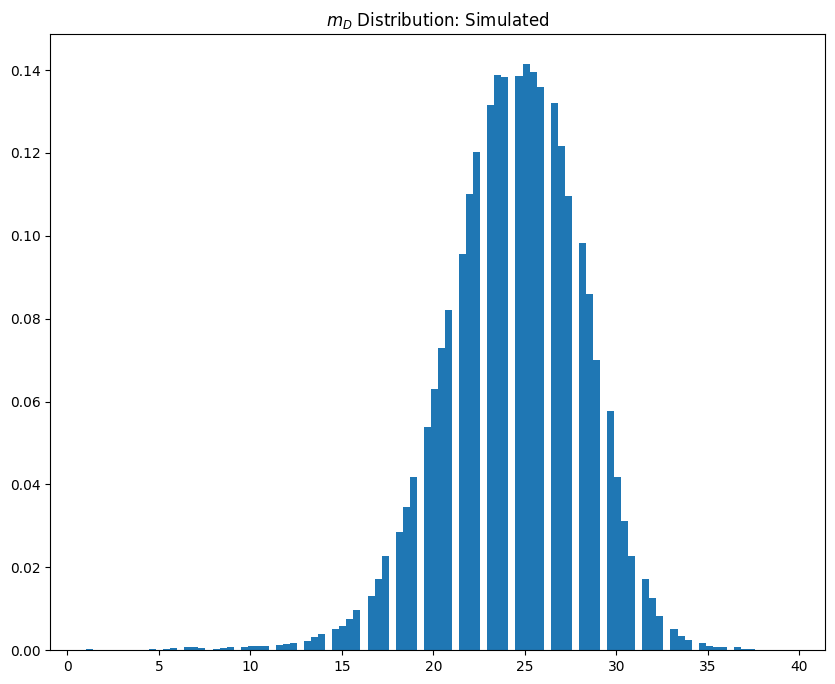

In [107]:
plt.figure(figsize=(10,8))
plt.hist(np.hstack(m_Ds), bins=100, density=True, histtype = 'stepfilled')
#plt.xscale('log')
#plt.yscale('log')
plt.title('$m_D$ Distribution: Simulated')

In [115]:
m_Ds_emp = []
ric = 'AMZN'
for j in pd.date_range(dt.date(2019,1,2), dt.date(2019,1,10)):
            if j == dt.date(2019,1,9): continue
            #l = dataLoader(ric, j, j, nlevels = 10, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
            #_ = l.load()
            try:
                data= pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/"+ric+'_'+j.strftime('%Y-%m-%d')+'_12D.csv')
            except:
                continue
            # events wrt distance from mid in ticks
            data = data.loc[data['Type'] < 5]
            data = data.loc[data['Type'] !=2]
            data['sec'] = data['Time'].astype(int)
            intensityPerSec = data.groupby(['sec','Type','TradeDirection'])['Time'].count().apply(lambda x: [x])
            data['q_LO'] = np.nan
            data['q_LO'].loc[data['Type'] == 1] = data['Size'].loc[data['Type'] == 1]
            data['q_MO'] = np.nan
            data['q_MO'].loc[data['Type'] == 4] = data['Size'].loc[data['Type'] == 4]
            #
            data['is'] = 0
            data['diff'] = data['Ask Price 1'].shift(1) - data['Ask Price 1']
            data['is'].loc[data['diff'] > 0]  = 1
            data['diff'] = data['Bid Price 1'] - data['Bid Price 1'].shift(1)
            data['is'].loc[data['diff'] > 0]  = 1
            #
            data['eta_is'] = np.nan
            data['eta_is'].loc[data['is'] == 1] = 100*data['diff'].loc[data['is'] == 1]

            for side in ['Ask','Bid']:
                data['m_T_'+ side] = (data[side + ' Price 2'] - data[side + ' Price 1']).apply(lambda x: np.abs(100*np.round(x,decimals=2)))
                arr = data[[side + ' Size ' + str(i) for i in range(1,11)]].values
                x = abs(arr.cumsum(axis=1) - (arr.sum(axis=1)/2).reshape((len(arr),1))).argmin(axis=1)
                data['M_0.5_'+ side] = (data[[side + ' Price ' + str(i) for i in range(1,11)]].values)[np.arange(len(data)),x]
                data['m_D_'+ side] = (data['M_0.5_'+ side] - data[side + ' Price 2']).apply(lambda x: np.abs(100*np.round(x,decimals=2)))
            m_Ds_emp.append((data['m_D_Ask'].values+data['m_D_Bid'].values)*0.5)

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/share/apps/python-3.8.5-shared/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


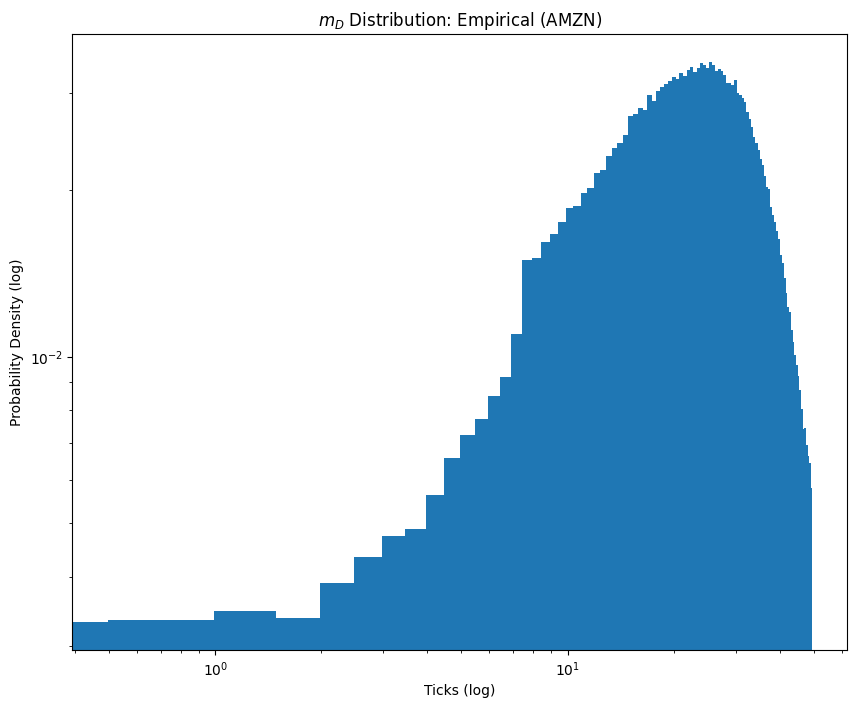

In [129]:
plt.figure(figsize=(10,8))
emp = np.hstack(m_Ds_emp)
plt.hist(emp[emp<50], bins=100, density=True, histtype = 'stepfilled')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ticks (log)')
plt.ylabel('Probability Density (log)')
plt.title('$m_D$ Distribution: Empirical (AMZN)')
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/empirical_m_D.png")

## avgSpread, SpreadBeta:

$$\lambda^{(IS)}(s, t) = \bigg(\frac{s-1}{\alpha}\bigg)^\beta \times \lambda^{(IS)}(t)$$

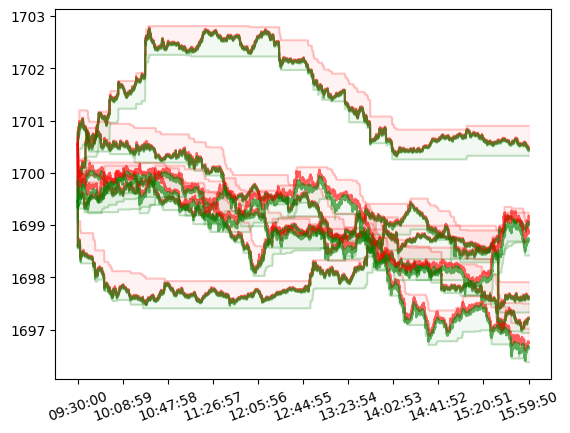

In [7]:
spreads = []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_tickness_' in fname:
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('beta_')[-1])
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, 'Spread Distribution -  various IS intensities')

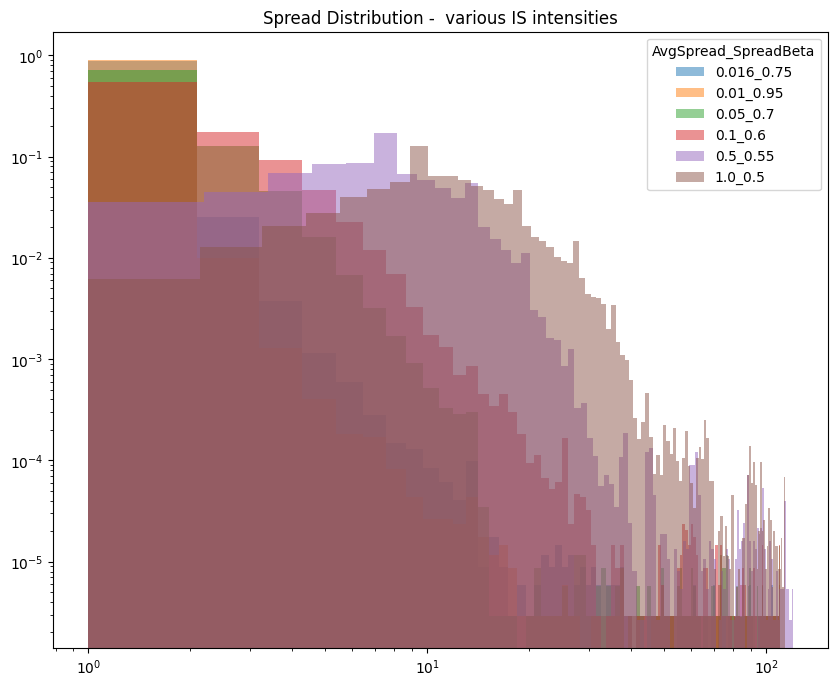

In [112]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution -  various IS intensities')

Text(0.5, 1.0, 'Spread Distribution - various IS intensities')

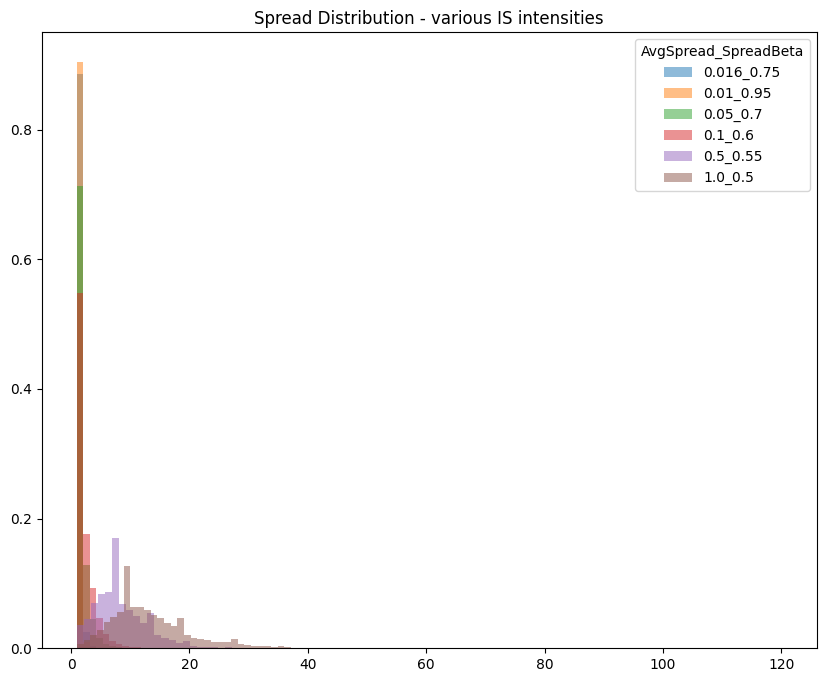

In [111]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
# plt.xscale('log')
# plt.yscale('log')
plt.title('Spread Distribution - various IS intensities')

Text(0.5, 1.0, 'Spread Distribution - various IS intensities')

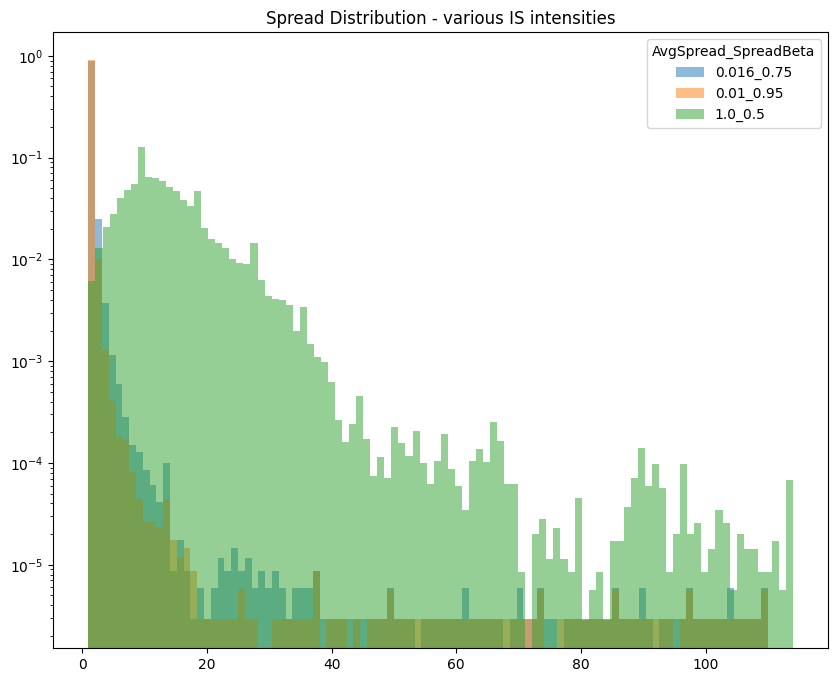

In [117]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    if l in ['0.01_0.95', '0.016_0.75', '1.0_0.5']:
        plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
# plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution - various IS intensities')
plt.ylabel('Probability Density (log)')
# plt.title('Shape of the LOB - various IS intensities')
plt.xlabel('Ticks')

In [12]:
volumes_1 , labels = [], [] 
for fname in fnames:
    if '_tickness_' in fname:
        # if  fname.split('_')[-1] not in ['5', '20', '50']:
        #     continue
        l = fname.split('beta_')[-1]
        if l in ['0.01_0.95', '0.016_0.75', '1.0_0.5']:
            with open(path+'\\'+fname, 'rb') as f:
                T, lob = pickle.load(f)
            volumes = []
            for r in lob:
                volume = [(( - r['Bid_deep'][0] + r['mid']) + 0.01*i, r['Bid_deep'][1]/r['Bid_m_D']) for i in range(int(r['Bid_m_D']))]
                volume += [((-r['Bid_touch'][0] + r['mid']), r['Bid_touch'][1])]
                volume += [((r['Ask_touch'][0] - r['mid']), r['Ask_touch'][1])]
                volume += [((r['Ask_deep'][0] - r['mid']) + 0.01*i, r['Ask_deep'][1]/r['Ask_m_D']) for i in range(int(r['Ask_m_D']))]
                volumes += [volume]
            volumes_1.append(volumes)
            labels.append(l)

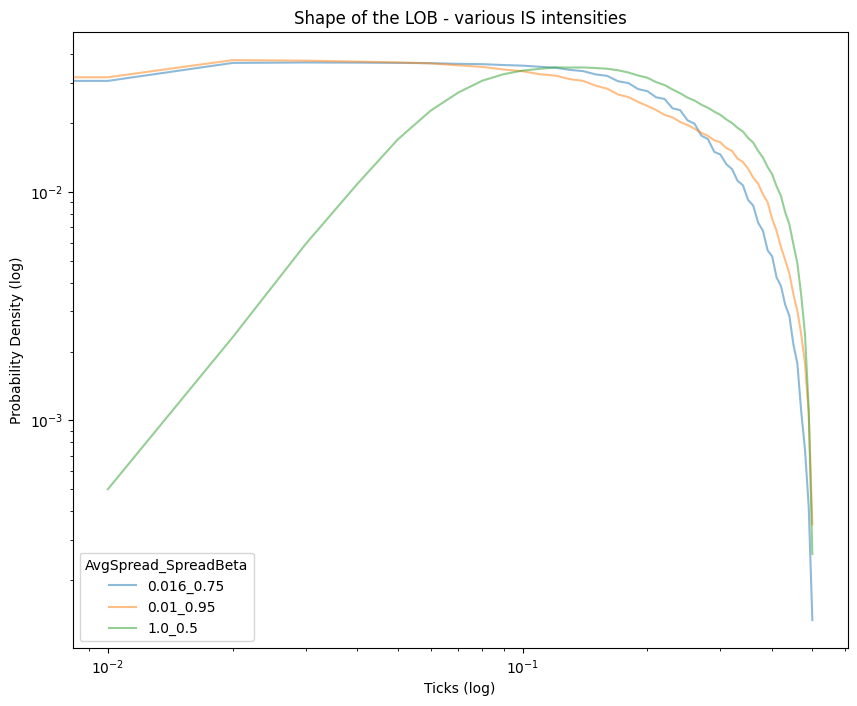

In [18]:
plt.figure(figsize=(10,8))
for volumes , label in zip(volumes_1, labels):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = list(dict_shape.keys())
    vol = np.array(list(dict_shape.values()))
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend(title = 'AvgSpread_SpreadBeta')
plt.ylabel('Probability Density (log)')
plt.title('Shape of the LOB - various IS intensities')
plt.xlabel('Ticks (log)')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_IS_shape.png')

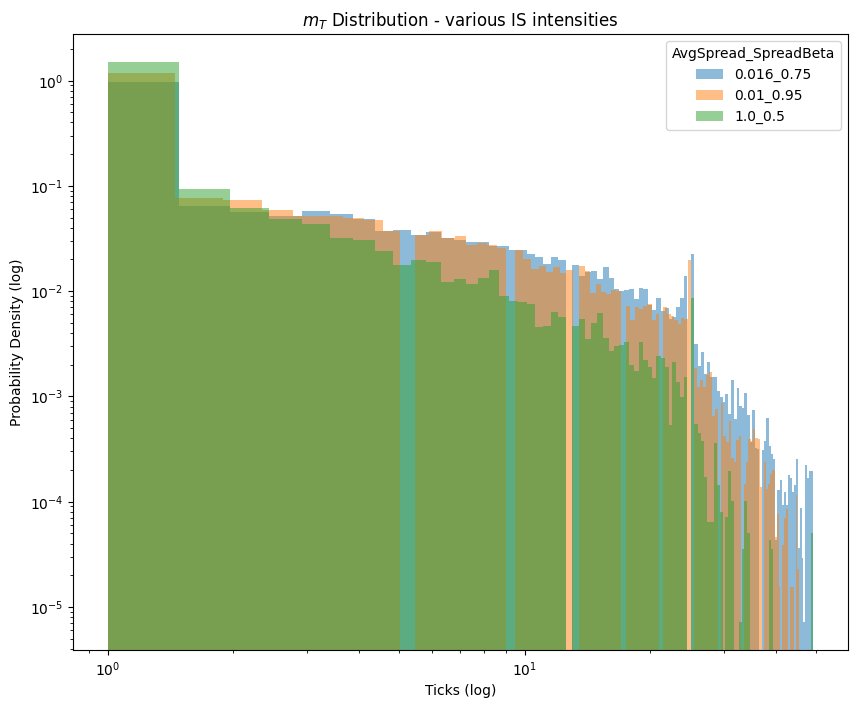

In [14]:
plt.figure(figsize=(10,8))
for s, l in zip(m_Ts, labels):
    if l in ['0.01_0.95', '0.016_0.75', '1.0_0.5']:
        plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ticks (log)')
plt.ylabel('Probability Density (log)')
plt.title('$m_T$ Distribution - various IS intensities')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_IS_m_T.png')

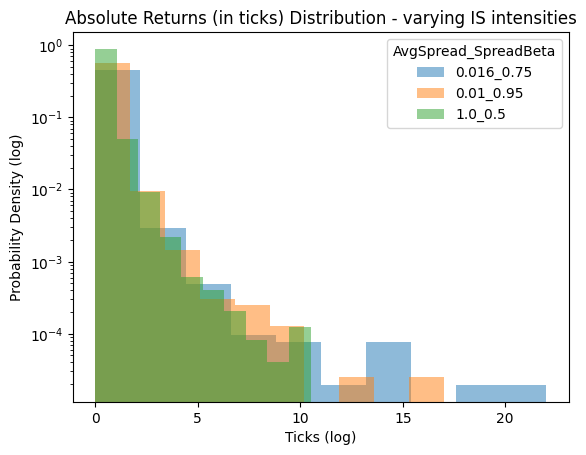

In [17]:
for fname in fnames:
   if '_tickness_' in fname:
        # if  fname.split('_')[-1] not in ['5', '20', '50']:
        #     continue
        l = fname.split('beta_')[-1]
        if l in ['0.01_0.95', '0.016_0.75', '1.0_0.5']:
            with open(path+'\\'+fname, 'rb') as f:
                T, lob = pickle.load(f)
            ask_t = []
            bid_t = []
            ask_d = []
            bid_d= []
            ask_m_D = []
            bid_m_D = []
            bid_m_D_1 = []
            ask_m_D_1 = []
            spread = []
            for r in lob:
                ask_t.append(r['Ask_touch'][0])
                bid_t.append(r['Bid_touch'][0])
    
            mid = (np.array(ask_t) + np.array(bid_t))/2
            tau = 1
            max_t = np.round(max(np.array(t) - 34200), decimals=0)
            sample_x = np.linspace(0, max_t, int(max_t/tau))
            idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
            sample_y = mid[idxs[idxs < len(mid)]]
            rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
            plt.hist(np.abs(rets)*100, alpha = 0.5, density = True,  histtype = 'stepfilled', label = l)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
plt.yscale('log')
plt.title('Absolute Returns (in ticks) Distribution - varying IS intensities')

plt.xlabel('Ticks')
plt.ylabel('Probability Density (log)')
# plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_IS_ret.png')
plt.show()

## M_med

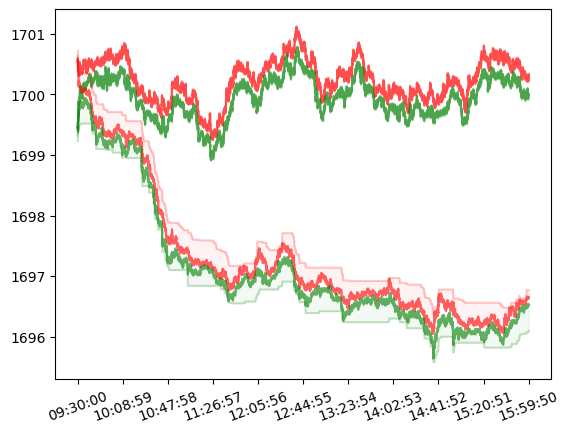

In [94]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_Mmed_' in fname:
        if  fname.split('_')[-1] not in ['5', '50']:
            continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
            
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, 'Spread Distribution - various maximum depth $M_{med}$')

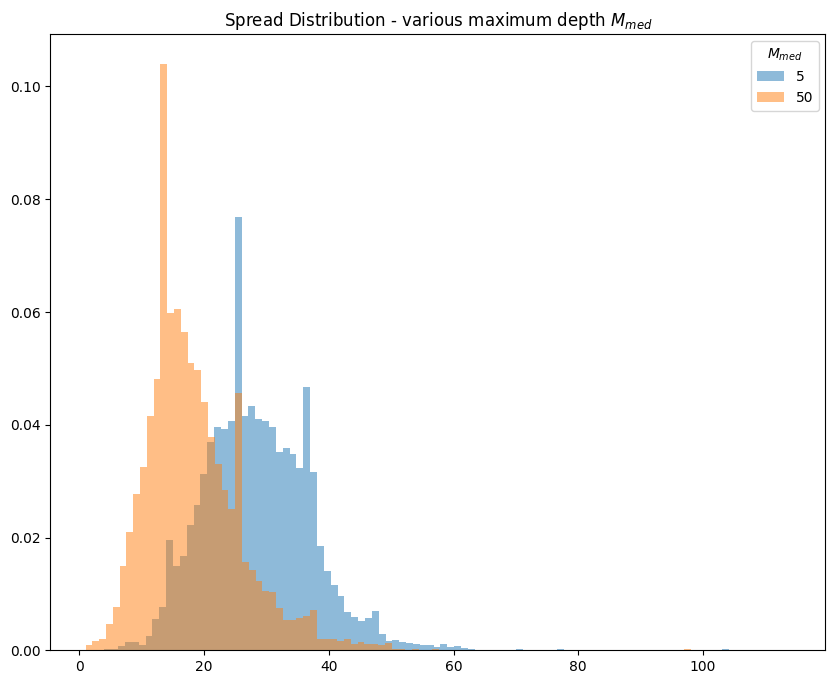

In [61]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(spreads, labels), key = lambda x: int(x[1])):
    if l not in ['5','10','20','50']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M_{med}$')
# plt.xscale('log')
# plt.yscale('log')
plt.title('Spread Distribution - various maximum depth $M_{med}$')

Text(0.5, 1.0, '$m_D$ Distribution - various maximum depth $M_{med}$')

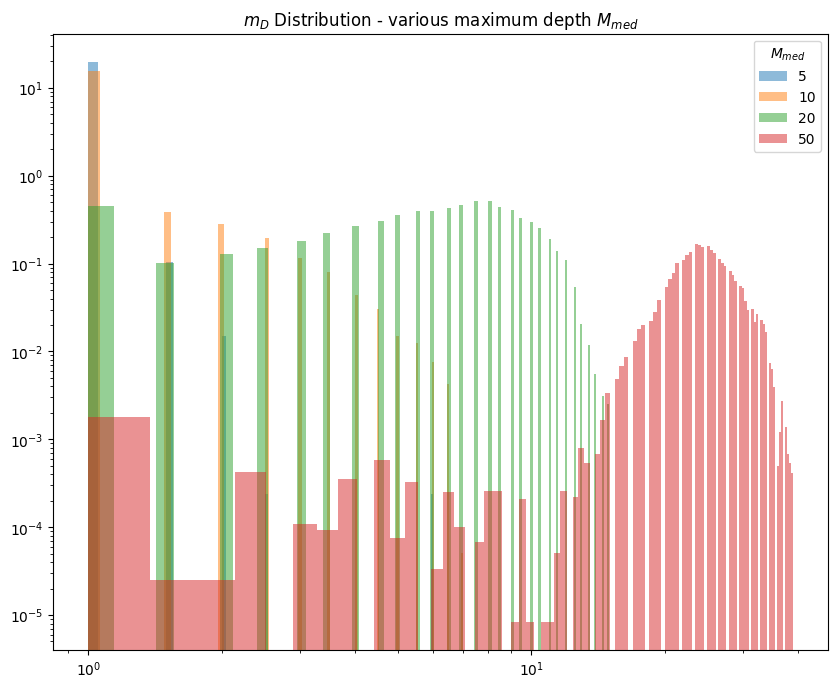

In [56]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ds, labels), key = lambda x: int(x[1])):
    if l not in ['5','10','20','50']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M_{med}$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_D$ Distribution - various maximum depth $M_{med}$')

Text(0.5, 1.0, '$m_T$ Distribution - various maximum depth $M_{med}$')

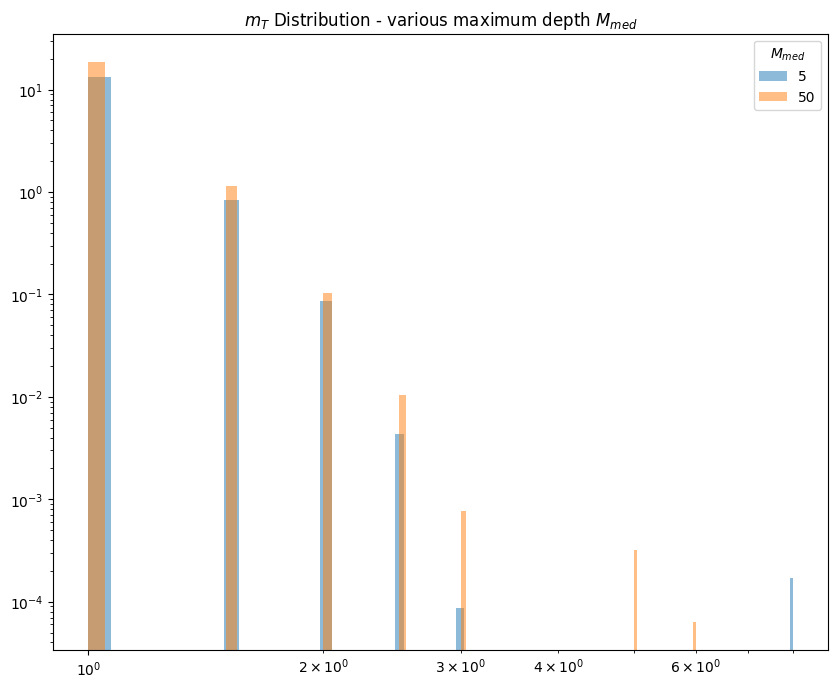

In [95]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ts, labels), key = lambda x: int(x[1])):
    if l not in ['5','10','20','50']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M_{med}$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_T$ Distribution - various maximum depth $M_{med}$')

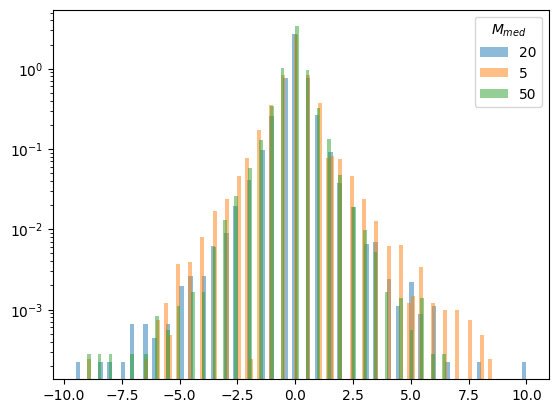

In [60]:
for fname in fnames:
    if '_Mmed_' in fname:
        if  fname.split('_')[-1] not in ['5','20', '50']:
            continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1 = []
        ask_m_D_1 = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])

        mid = (np.array(ask_t) + np.array(bid_t))/2
        tau = 1
        max_t = np.round(max(np.array(t) - 34200), decimals=0)
        sample_x = np.linspace(0, max_t, int(max_t/tau))
        idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
        sample_y = mid[idxs[idxs < len(mid)]]
        rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
        plt.hist(rets*100, bins = 100, alpha = 0.5, density = True, label = fname.split('_')[-1])
plt.legend(loc='upper right', title = '$M_{med}$')
plt.yscale('log')
plt.show()

In [88]:
volumes_1 , labels = [], [] 
for fname in fnames:
    if '_Mmed_' in fname:
        # if  fname.split('_')[-1] not in ['5', '20', '50']:
        #     continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        volumes = []
        for r in lob:
            volume = [(( - r['Bid_deep'][0] + r['mid']) + 0.01*i, r['Bid_deep'][1]/r['Bid_m_D']) for i in range(int(r['Bid_m_D']))]
            volume += [((-r['Bid_touch'][0] + r['mid']), r['Bid_touch'][1])]
            volume += [((r['Ask_touch'][0] - r['mid']), r['Ask_touch'][1])]
            volume += [((r['Ask_deep'][0] - r['mid']) + 0.01*i, r['Ask_deep'][1]/r['Ask_m_D']) for i in range(int(r['Ask_m_D']))]
            volumes += [volume]
        volumes_1.append(volumes)
        labels.append(fname.split('_')[-1])

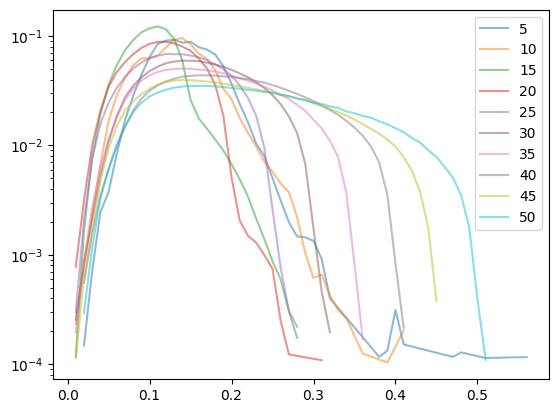

In [89]:
for volumes , label in sorted(zip(volumes_1, labels), key = lambda x: int(x[1])):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = list(dict_shape.keys())
    vol = np.array(list(dict_shape.values()))
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend()

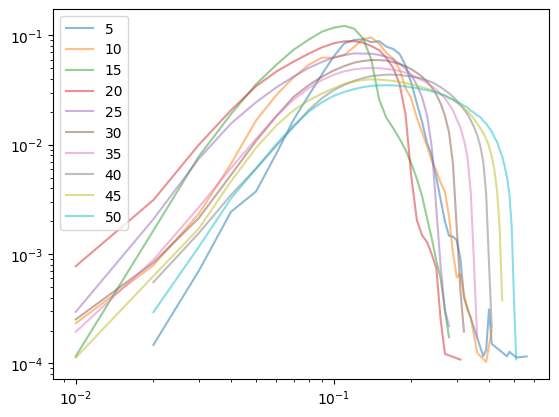

In [93]:
for volumes , label in sorted(zip(volumes_1, labels), key = lambda x: int(x[1])):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = list(dict_shape.keys())
    vol = np.array(list(dict_shape.values()))
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend()

## Initial Sparsity - M0

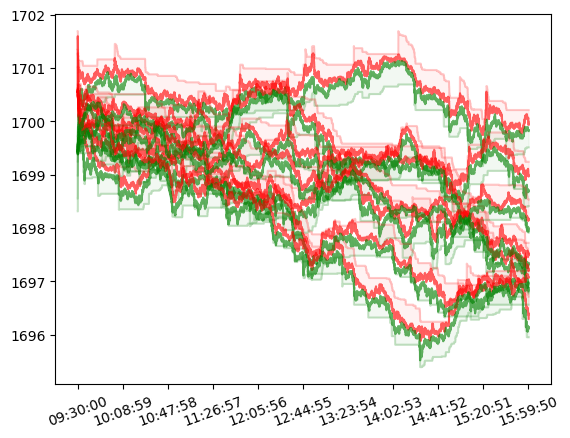

In [96]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_M0_' in fname:
        # if  fname.split('_')[-1] not in ['5', '50']:
        #     continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
            
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, '$m_T$ Distribution - various maximum depth $M0$')

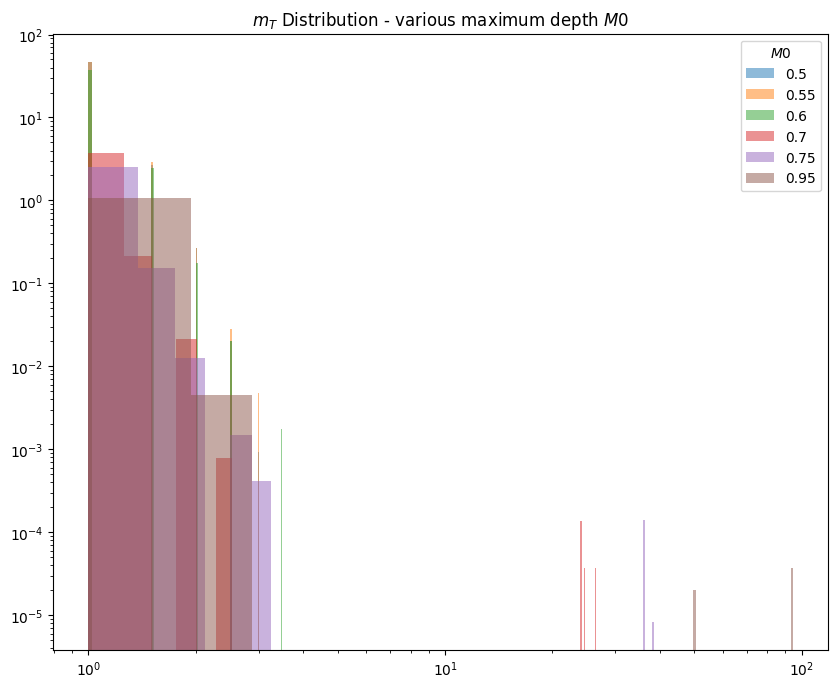

In [103]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ts, labels), key = lambda x: float(x[1])):
    # if l not in ['5','10','20','50']:
    #     continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M0$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_T$ Distribution - various maximum depth $M0$')

Text(0.5, 1.0, '$m_D$ Distribution - various maximum depth $M0$')

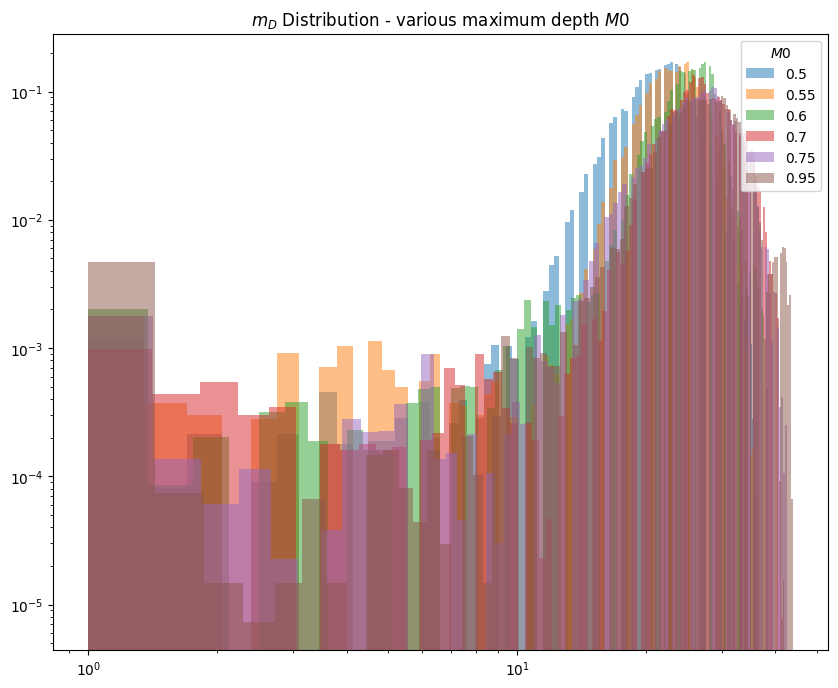

In [104]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ds, labels), key = lambda x: float(x[1])):
    # if l not in ['5','10','20','50']:
    #     continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M0$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_D$ Distribution - various maximum depth $M0$')

## Varying Sparsity - eta

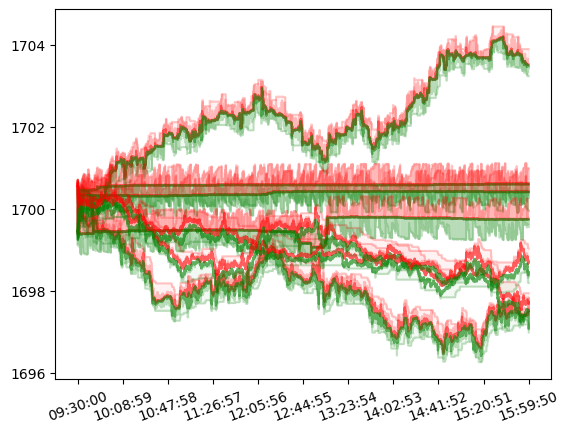

In [122]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_eta_' in fname:
        # if  fname.split('_')[-1] not in ['5', '50']:
        #     continue
        with open(path+fname, 'rb') as f:
            T, lob = pickle.load(f)
            
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_31876\1393846916.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_31876\1393846916.py:8: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Spread Distribution -  sparsity $\hat{\eta}$')


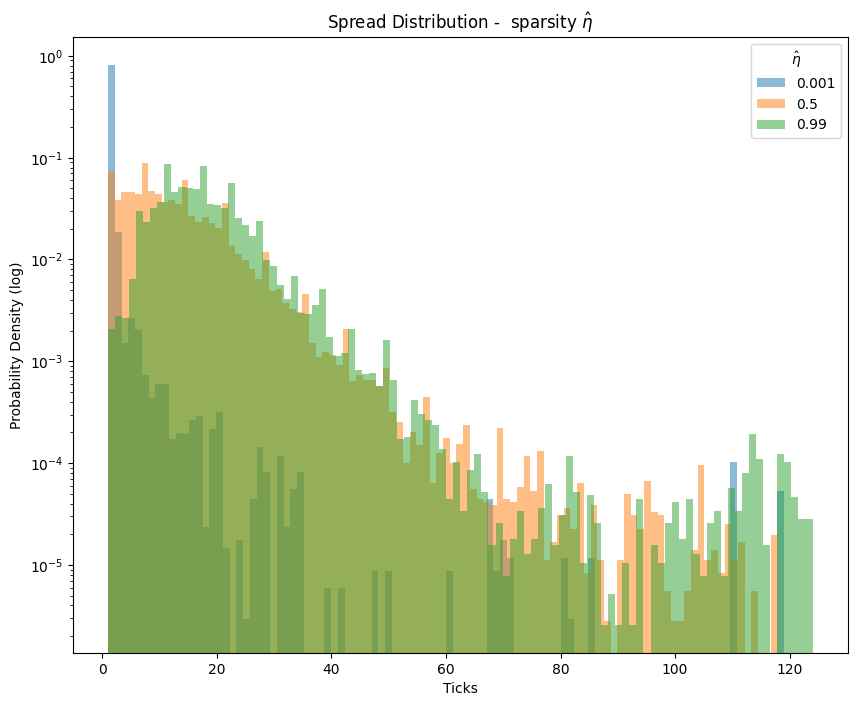

In [20]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    if l in ['0.001', '0.5', '0.99']:        
        plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$\hat{\eta}$')
# plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution -  sparsity $\hat{\eta}$')
plt.xlabel('Ticks')
plt.ylabel('Probability Density (log)')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_spr.png')

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\65748692.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\65748692.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')


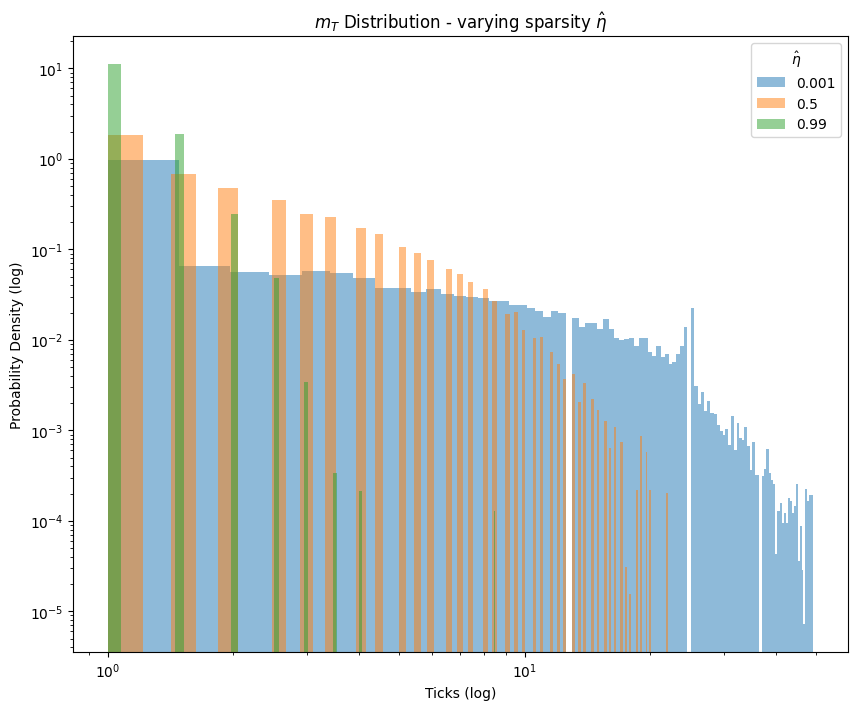

In [38]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ts, labels), key = lambda x: float(x[1])):
    if l not in ['0.001', '0.5', '0.99']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$\hat{\eta}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ticks (log)')
plt.ylabel('Probability Density (log)')
plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_m_T.png')

Text(0, 0.5, 'Probability Density (log)')

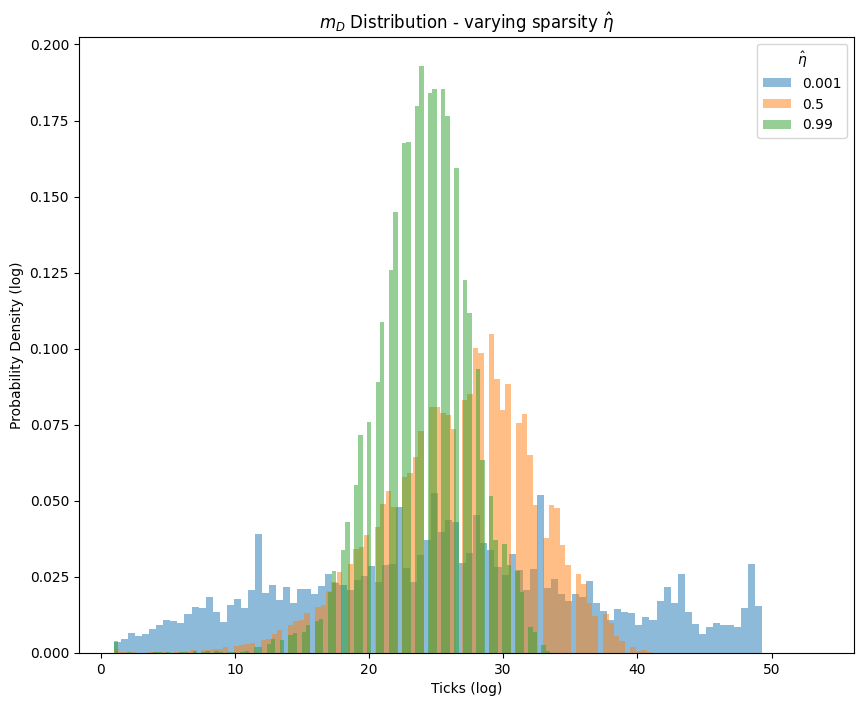

In [123]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ds, labels), key = lambda x: float(x[1])):
    if l not in ['0.001', '0.5', '0.99']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$\hat{\eta}$')
#plt.xscale('log')
#plt.yscale('log')
plt.title('$m_D$ Distribution - varying sparsity $\hat{\eta}$')
plt.xlabel('Ticks ')
plt.ylabel('Probability Density (log)')
# plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
#plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_m_D.png')

<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_31876\1914718084.py:28: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_31876\1914718084.py:30: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Absolute Returns (in ticks) Distribution - varying sparsity $\hat{\eta}$')


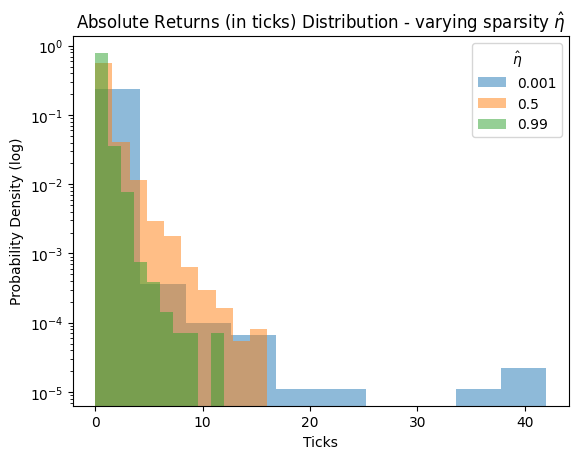

In [21]:
for fname in fnames:
    if '_eta_' in fname:
        if  fname.split('_')[-1] not in ['0.001', '0.5', '0.99']:
            continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1 = []
        ask_m_D_1 = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])

        mid = (np.array(ask_t) + np.array(bid_t))/2
        tau = 1
        max_t = np.round(max(np.array(t) - 34200), decimals=0)
        sample_x = np.linspace(0, max_t, int(max_t/tau))
        idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
        sample_y = mid[idxs[idxs < len(mid)]]
        rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
        plt.hist(np.abs(rets)*100, alpha = 0.5, density = True,  histtype = 'stepfilled', label = fname.split('_')[-1])
plt.legend(loc='upper right', title = '$\hat{\eta}$')
plt.yscale('log')
plt.title('Absolute Returns (in ticks) Distribution - varying sparsity $\hat{\eta}$')

plt.xlabel('Ticks')
plt.ylabel('Probability Density (log)')
# plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_ret.png')
plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_31876\2269517513.py:32: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_31876\2269517513.py:34: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Shape of the LOB - varying sparsity $\hat{\eta}$')


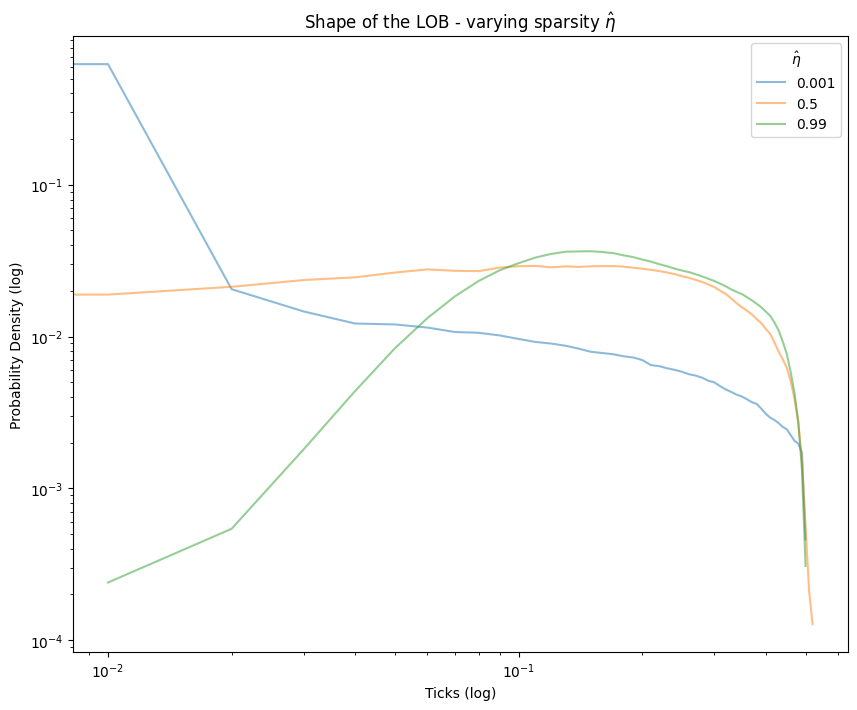

In [31]:
# volumes_1 , labels = [], [] 
# for fname in fnames:
#    if '_eta_' in fname:
#         if  fname.split('_')[-1] not in ['0.001', '0.5', '0.99']:
#             continue
#         with open(path+'\\'+fname, 'rb') as f:
#             T, lob = pickle.load(f)
#         if True:
#             volumes = []
#             for r in lob:
#                 volume = [(( - r['Bid_deep'][0] + r['mid']) + 0.01*i, r['Bid_deep'][1]/r['Bid_m_D']) for i in range(int(r['Bid_m_D']))]
#                 volume += [((-r['Bid_touch'][0] + r['mid']), r['Bid_touch'][1])]
#                 volume += [((r['Ask_touch'][0] - r['mid']), r['Ask_touch'][1])]
#                 volume += [((r['Ask_deep'][0] - r['mid']) + 0.01*i, r['Ask_deep'][1]/r['Ask_m_D']) for i in range(int(r['Ask_m_D']))]
#                 volumes += [volume]
#             volumes_1.append(volumes)
#             labels.append(fname.split('_')[-1])
plt.figure(figsize=(10,8))
for volumes , label in zip(volumes_1, ['0.001', '0.5', '0.99']):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = np.sort(list(dict_shape.keys()))
    vol = np.array([dict_shape[d] for d in dist])
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4 ], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper right', title = '$\hat{\eta}$')
plt.ylabel('Probability Density (log)')
plt.title('Shape of the LOB - varying sparsity $\hat{\eta}$')
plt.xlabel('Ticks (log)')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_shape.png')

# Assumptions Evidence

In [127]:
with open("/SAN/fca/Konark_PhD_Experiments/smallTick/CHTR_EDA_assumptions", 'rb') as f:
    res = pickle.load(f)

## cond / uncond prod 

In [ ]:
orderDict = {10:'LO', 11:'IS', 30: 'CO', 40:'MO'}
for s in stocks:
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_assumptions", 'rb') as f:
            res = pickle.load(f)
    except:
        continue
    uncond = res['uncondCounts_mT'].reset_index()
    uncond['Type'] = uncond['Type_mT'].apply(lambda x: orderDict[int(x[:2])])
    uncond['mT'] = uncond['Type_mT'].apply(lambda x: np.abs(int(x[2:])))
    #raw = uncond.groupby('mT')['Time'].sum()/uncond['Time'].sum()
    #raw['cat'] = raw['mT'].apply(lambda x: categories[np.searchsorted(categories, x)])
    #raw = raw.groupby('cat')['Time'].sum()
    uncond['Time'] = uncond['Time']/uncond['Time'].sum()
    df = res['uncondCounts_mT']/res['uncondCounts_mT'].sum()
    df = df[df>1e-4].reset_index()
    df['mT'] = df['Type_mT'].apply(lambda x: int(x[2:]))
    depthMax = df['mT'].max()
    depthMin = df['mT'].min()
    categories = np.logspace(np.log(depthMin)/np.log(10),np.log(depthMax)/np.log(10), 50) #np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
    categories =np.unique(categories.astype(int))
    #categories = np.arange(1,40,5)
    cat_names = np.append(categories, ['>'+str(categories[-1])]) #['<=1','(1,100]','(100,200]','(200,500]','(500,1000]', '(1000,2000]', '>2000']
    uncond['cat'] = uncond['mT'].apply(lambda x: cat_names[np.searchsorted(categories, x)])
    uncond = ((uncond.groupby(['Type','cat'])['Time'].sum()/uncond.groupby(['Type'])['Time'].sum())/uncond.groupby(['cat'])['Time'].sum()).reset_index()
    uncond.columns = ['OrderType','$m_T$','Probability Ratio']
    df = uncond
    dfp = df.pivot_table(index='$m_T$', columns='OrderType', values=['Probability Ratio'], aggfunc='sum')
    dfp = dfp.reindex(index=cat_names)
    plt.figure()
    #plt.title(s + ' independence mT')
    dfp.plot(kind='bar', subplots=True, rot=90, figsize=(18, 6), layout=(1, 4), title= s + ' $m_T$ vs $\\frac{P(e, m_T)}{P(e)P(m_T)}$', ylabel = 'Probability Ratio')
    #plt.yscale('log')
    plt.tight_layout()
    plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_independence_m_T.png")

In [ ]:
orderDict = {10:'LO', 11:'IS', 30: 'CO', 40:'MO'}
for s in stocks:
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_assumptions", 'rb') as f:
            res = pickle.load(f)
    except:
        continue
    uncond = res['uncondCounts_mD'].reset_index()
    uncond['Type'] = uncond['Type_mD'].apply(lambda x: orderDict[int(x[:2])])
    uncond['mD'] = uncond['Type_mD'].apply(lambda x: np.abs(int(x[2:])))
    #raw = uncond.groupby('mD')['Time'].sum()/uncond['Time'].sum()
    #raw['cat'] = raw['mD'].apply(lambda x: categories[np.searchsorted(categories, x)])
    #raw = raw.groupby('cat')['Time'].sum()
    uncond['Time'] = uncond['Time']/uncond['Time'].sum()
    df = res['uncondCounts_mD']/res['uncondCounts_mD'].sum()
    df = df[df>1e-4].reset_index()
    df['mD'] = df['Type_mD'].apply(lambda x: 1+int(x[2:]))
    depthMax = df['mD'].max()
    depthMin = df['mD'].min()
    categories = np.logspace(np.log(depthMin)/np.log(10),np.log(depthMax)/np.log(10), 50) #np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
    categories =np.unique(categories.astype(int))
    #categories = np.arange(1,40,5)
    cat_names = np.append(categories, ['>'+str(categories[-1])]) #['<=1','(1,100]','(100,200]','(200,500]','(500,1000]', '(1000,2000]', '>2000']
    uncond['cat'] = uncond['mD'].apply(lambda x: cat_names[np.searchsorted(categories, x)])
    uncond = ((uncond.groupby(['Type','cat'])['Time'].sum()/uncond.groupby(['Type'])['Time'].sum())/uncond.groupby(['cat'])['Time'].sum()).reset_index()
    uncond.columns = ['OrderType','$m_D$','Probability Ratio']
    df = uncond
    dfp = df.pivot_table(index='$m_D$', columns='OrderType', values=['Probability Ratio'], aggfunc='sum')
    dfp = dfp.reindex(index=cat_names)
    plt.figure()
    #plt.title(s + ' independence mD')
    dfp.plot(kind='bar', subplots=True, rot=90, figsize=(18, 6), layout=(1, 4), title= s + ' $m_D$ vs $\\frac{P(e, m_D)}{P(e)P(m_D)}$', ylabel = 'Probability Ratio')
    #plt.yscale('log')
    plt.tight_layout()
    plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_independence_m_D.png")

/tmp/ipykernel_53838/1756392955.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

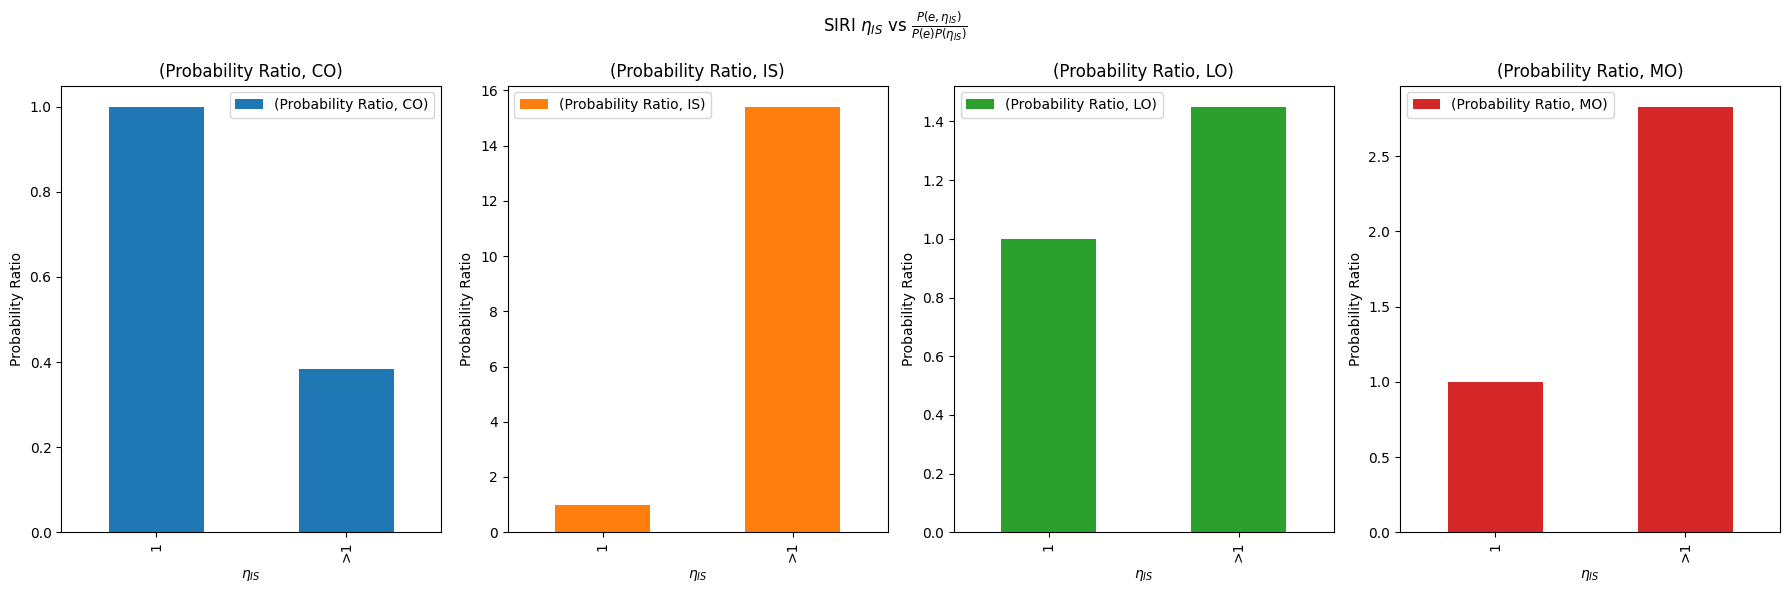

<Figure size 640x480 with 0 Axes>

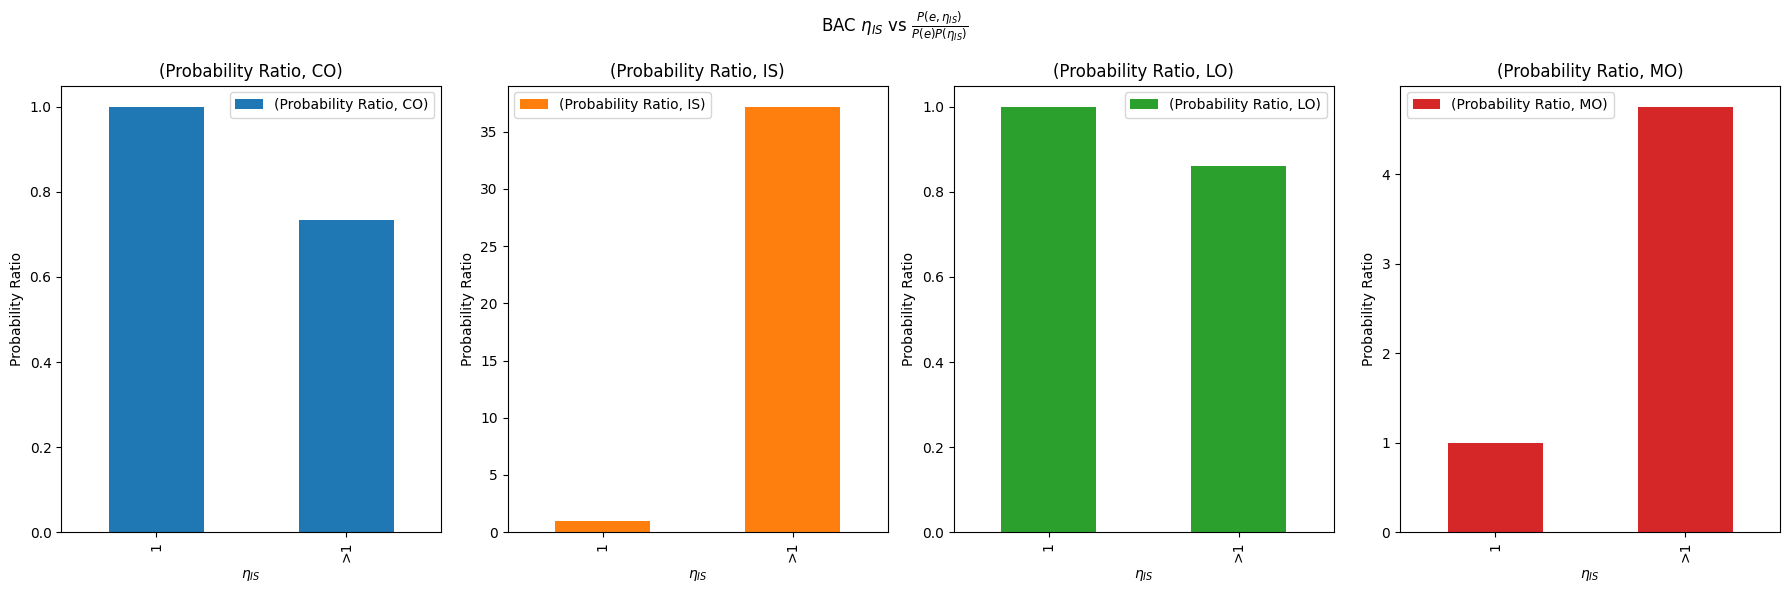

<Figure size 640x480 with 0 Axes>

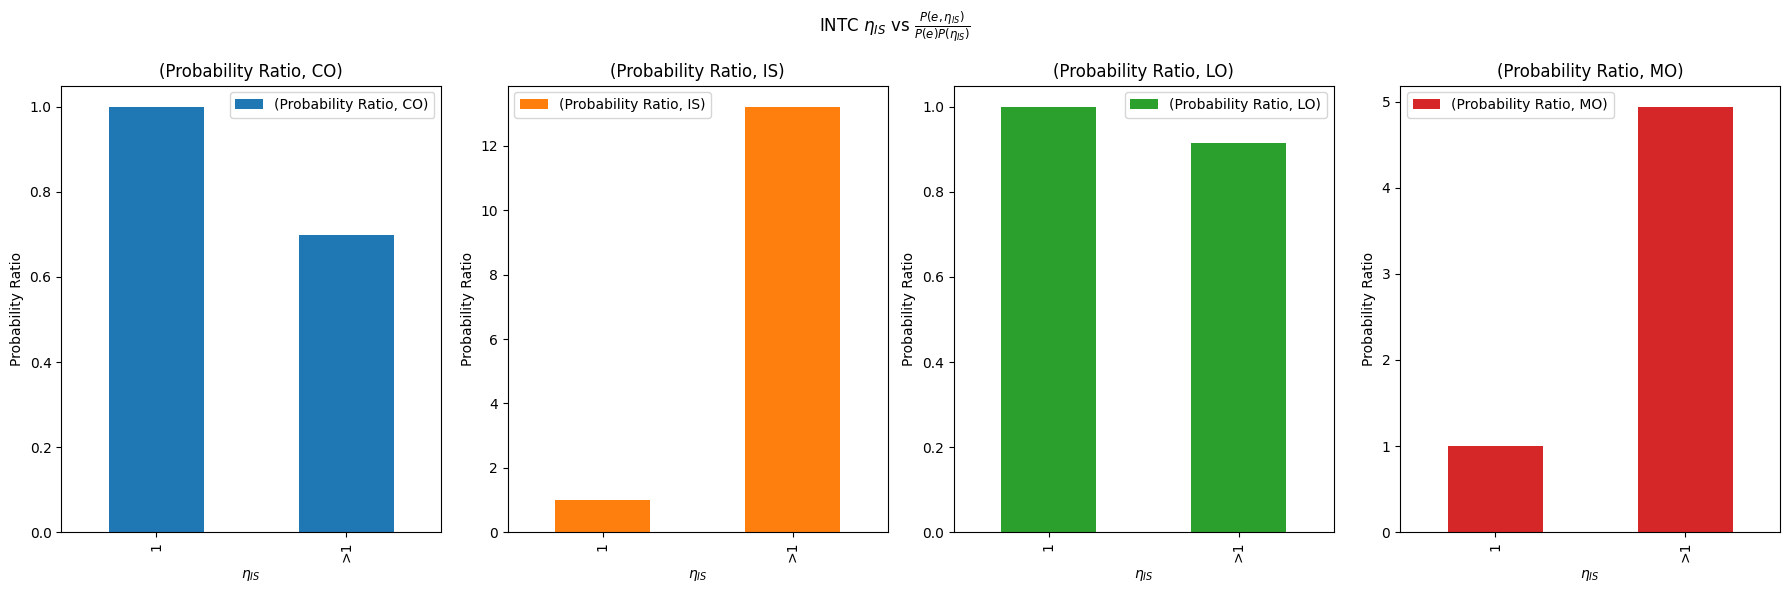

<Figure size 640x480 with 0 Axes>

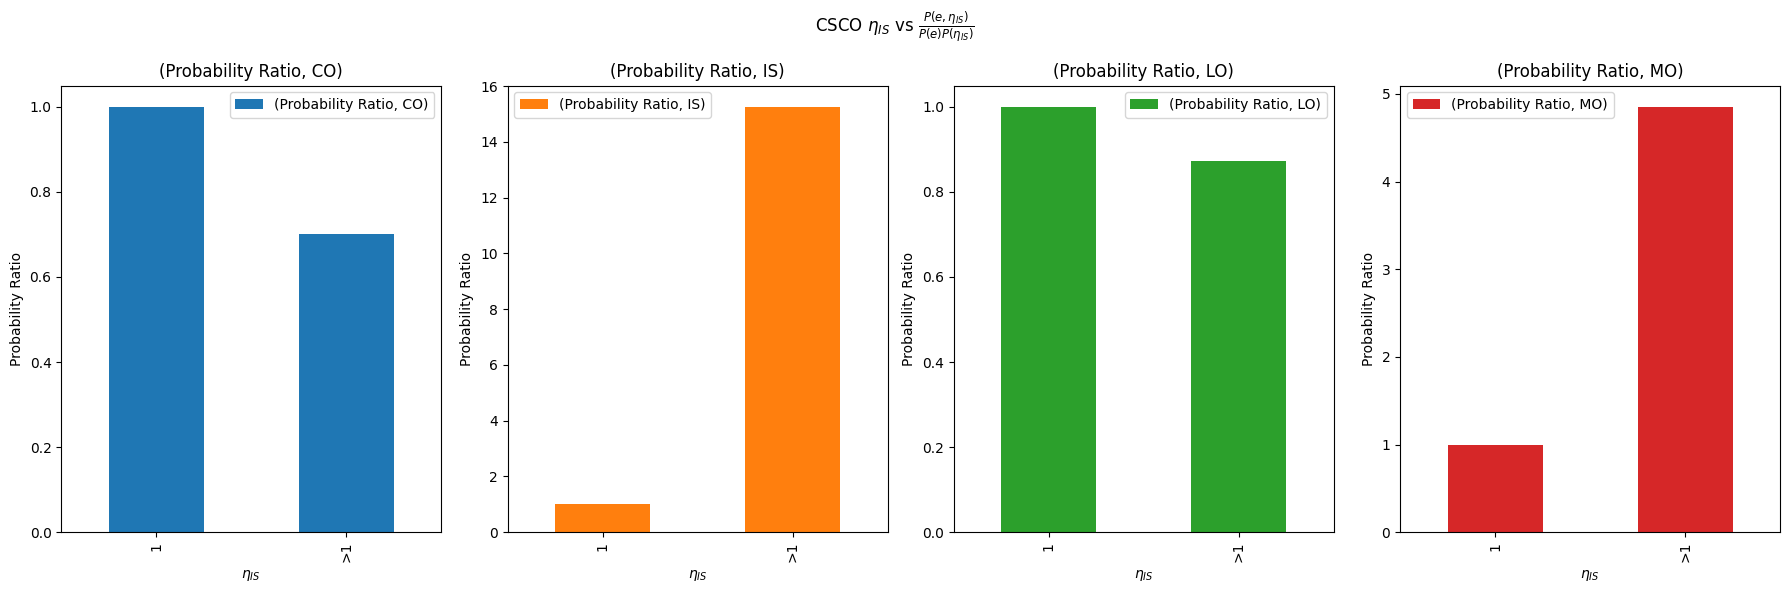

<Figure size 640x480 with 0 Axes>

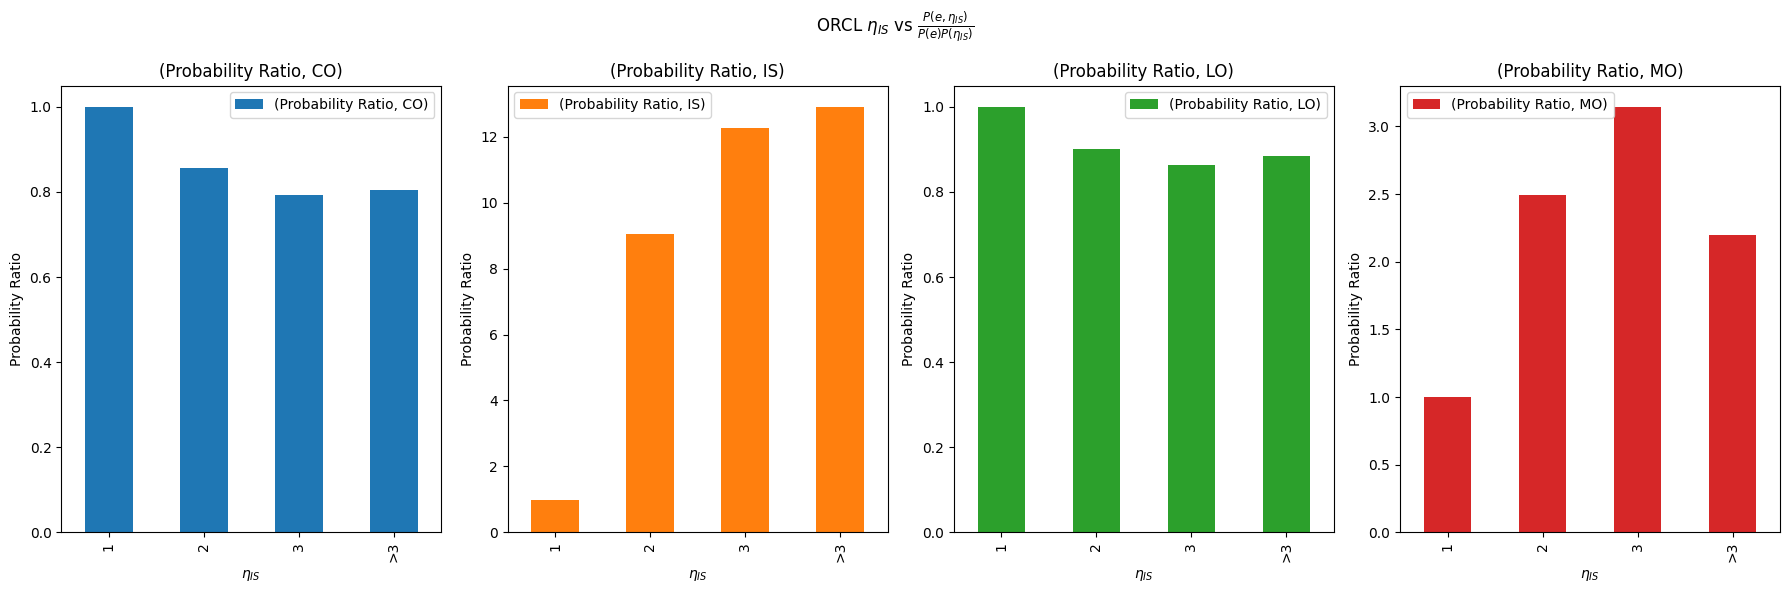

<Figure size 640x480 with 0 Axes>

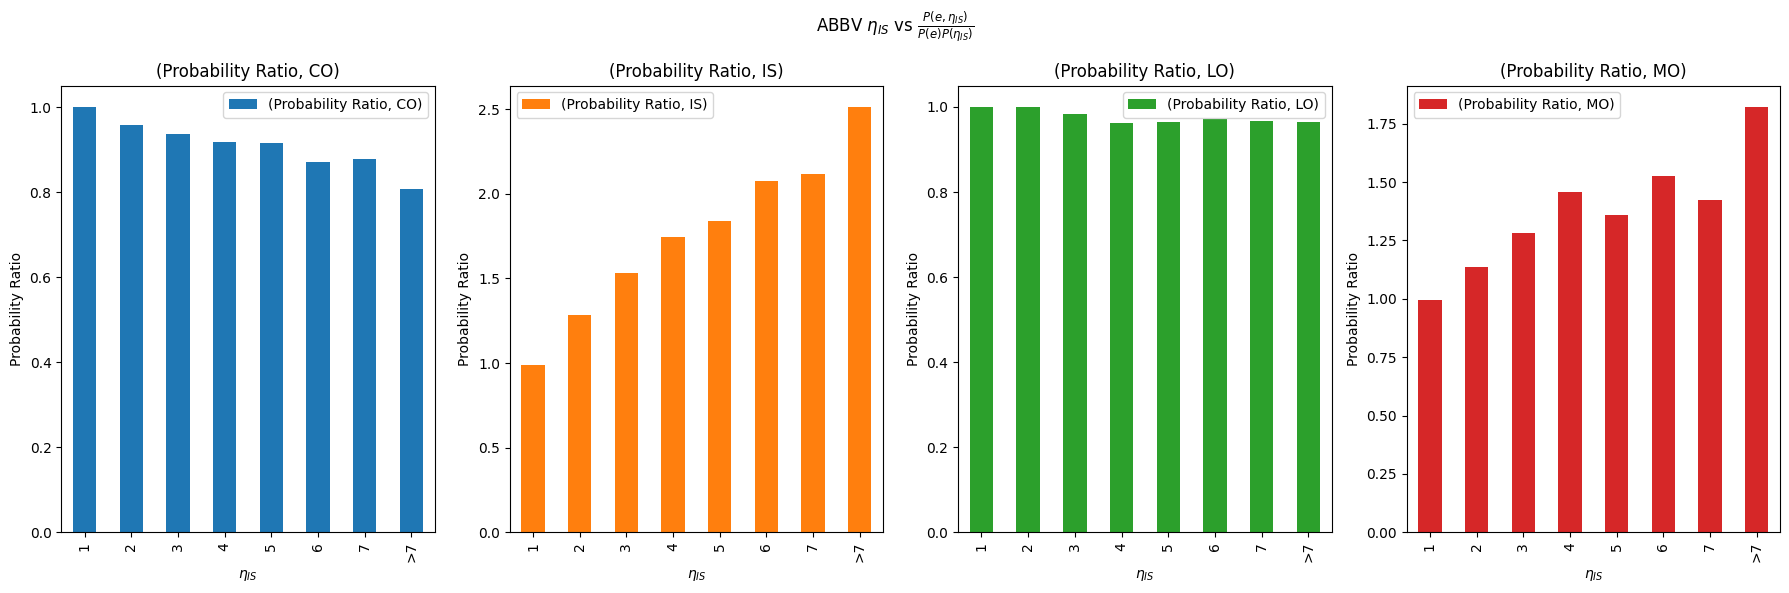

<Figure size 640x480 with 0 Axes>

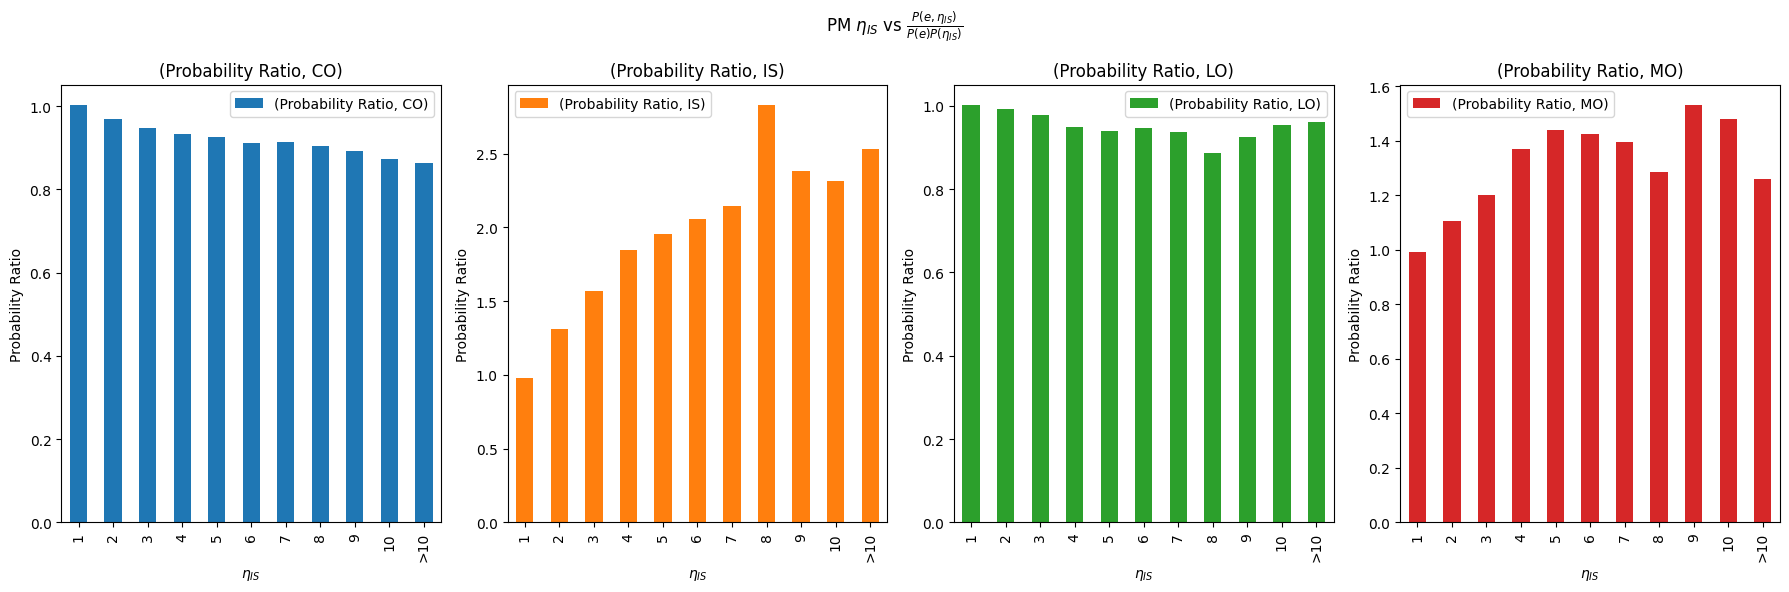

<Figure size 640x480 with 0 Axes>

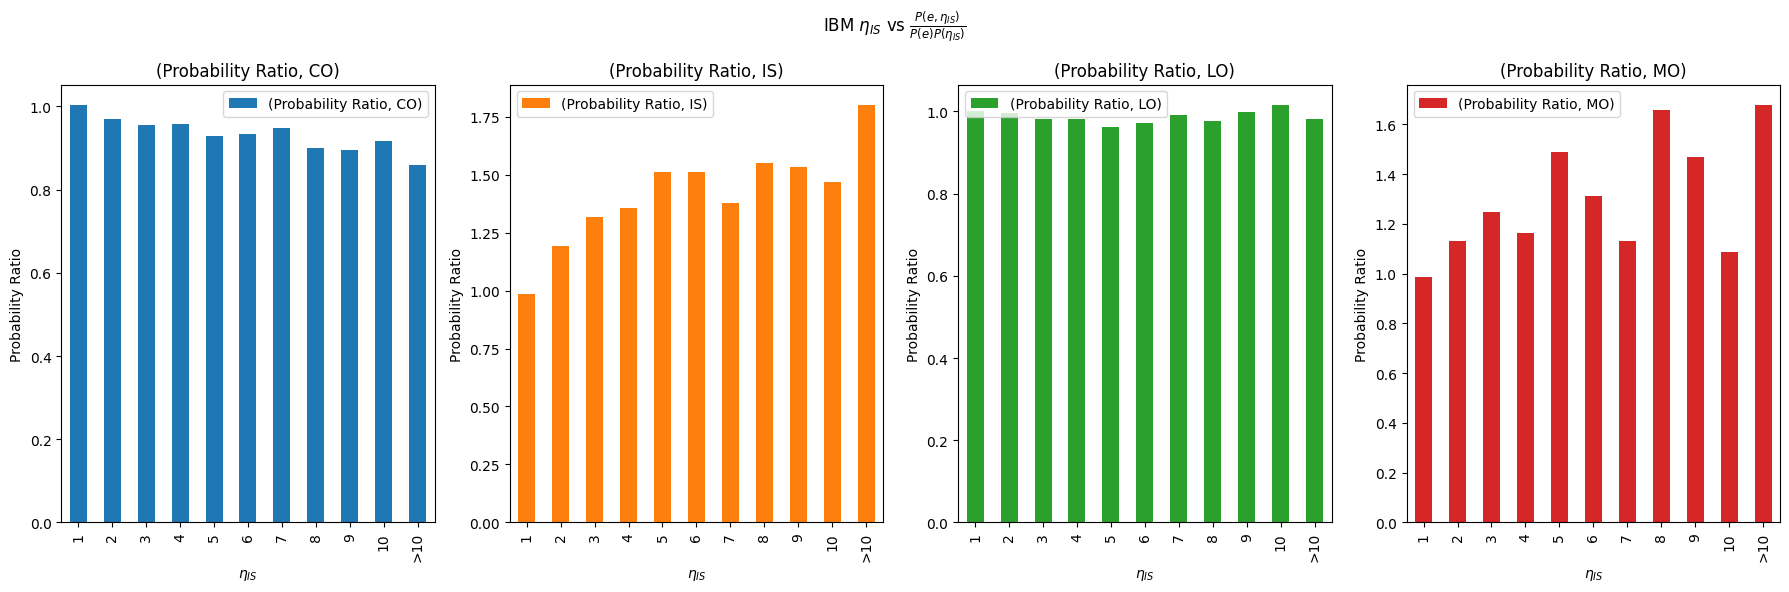

<Figure size 640x480 with 0 Axes>

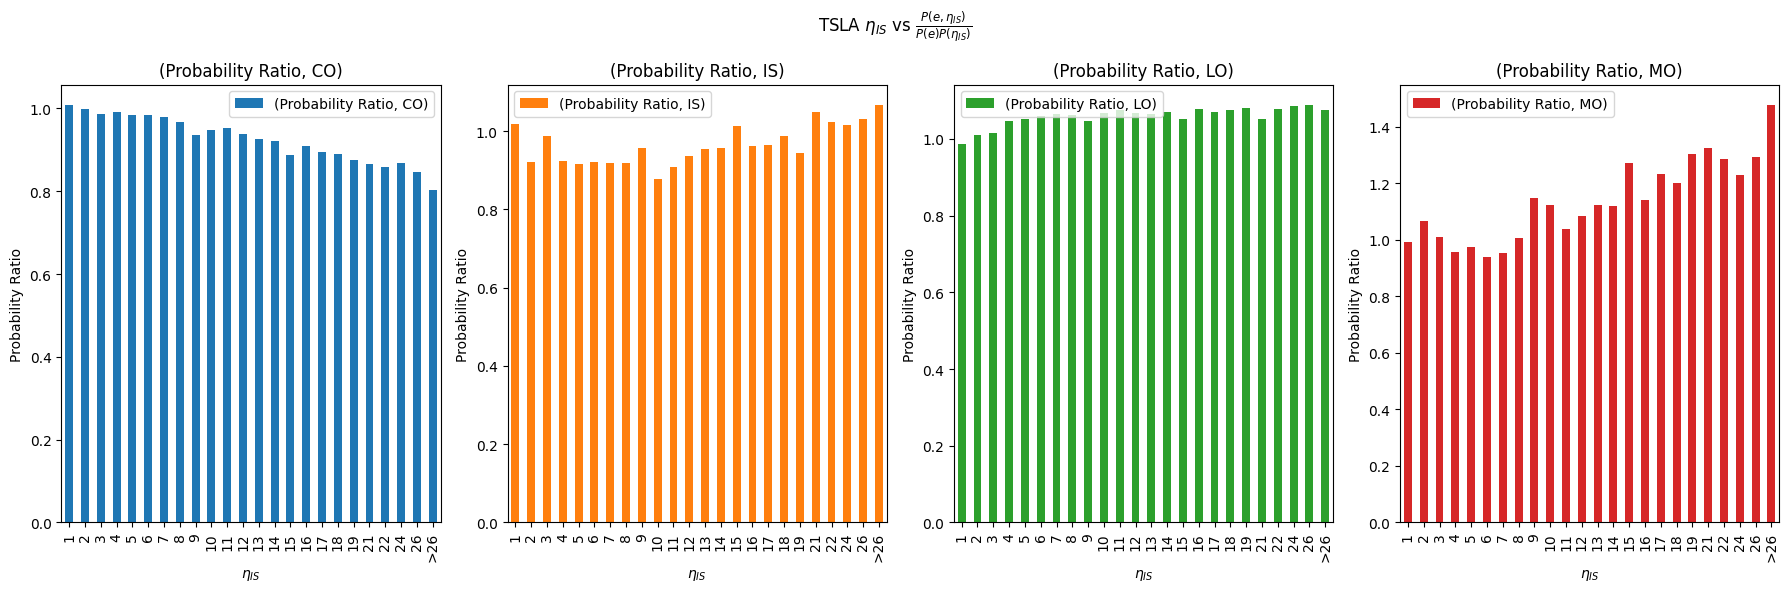

<Figure size 640x480 with 0 Axes>

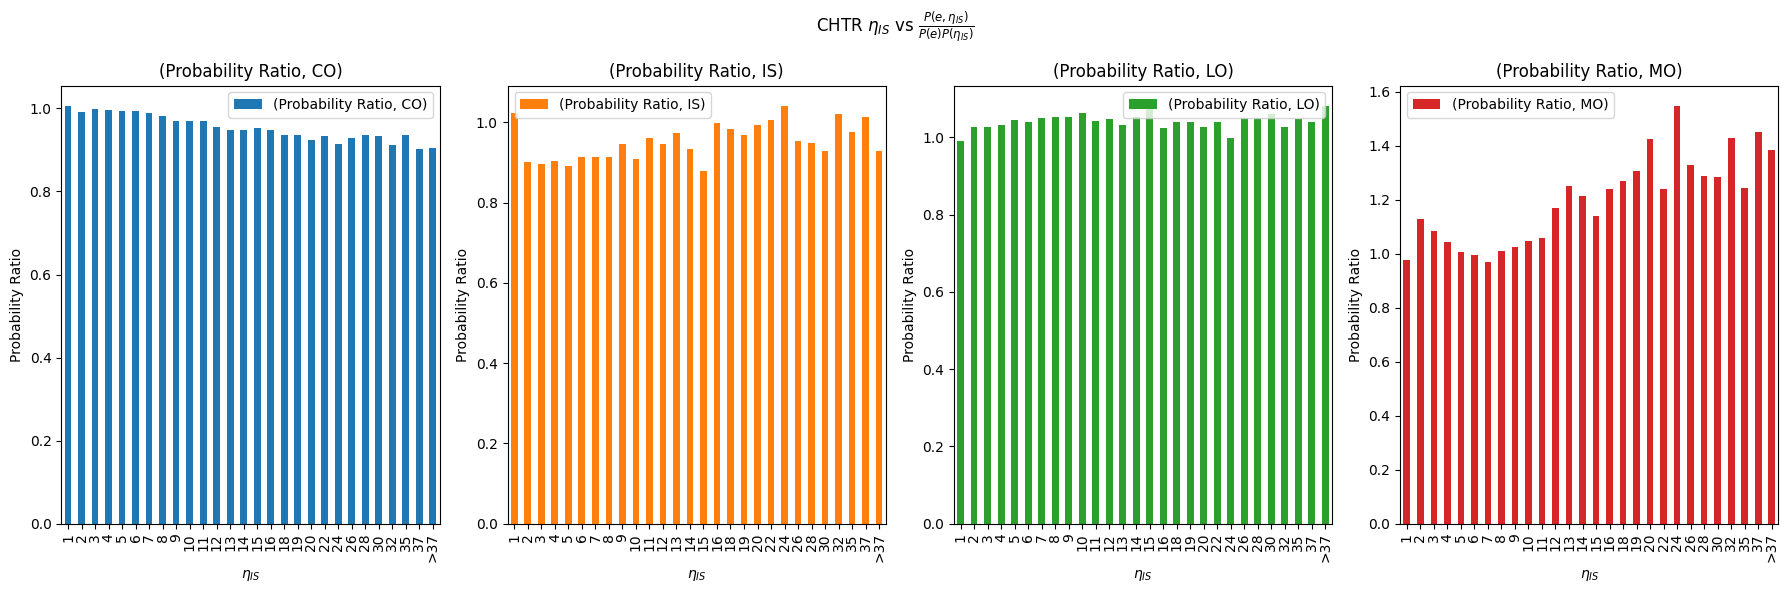

<Figure size 640x480 with 0 Axes>

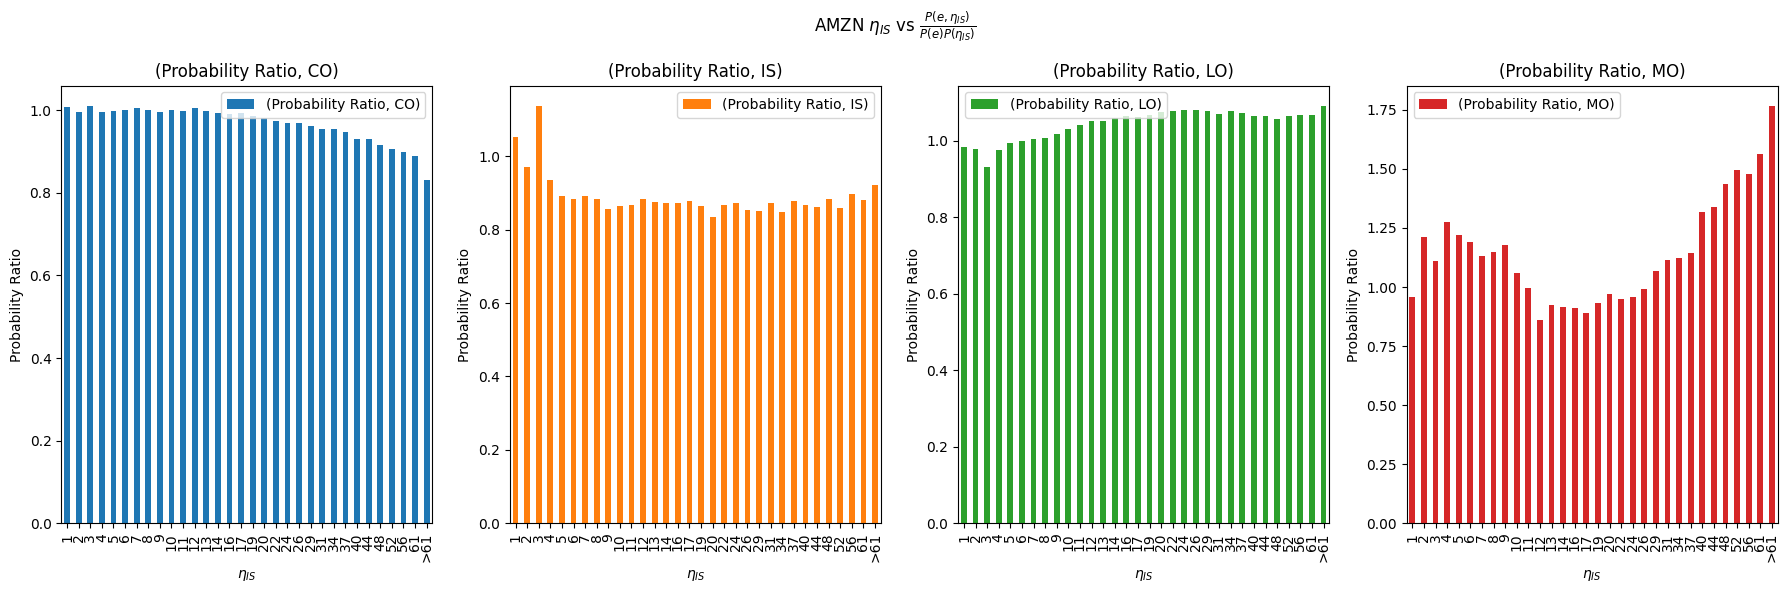

<Figure size 640x480 with 0 Axes>

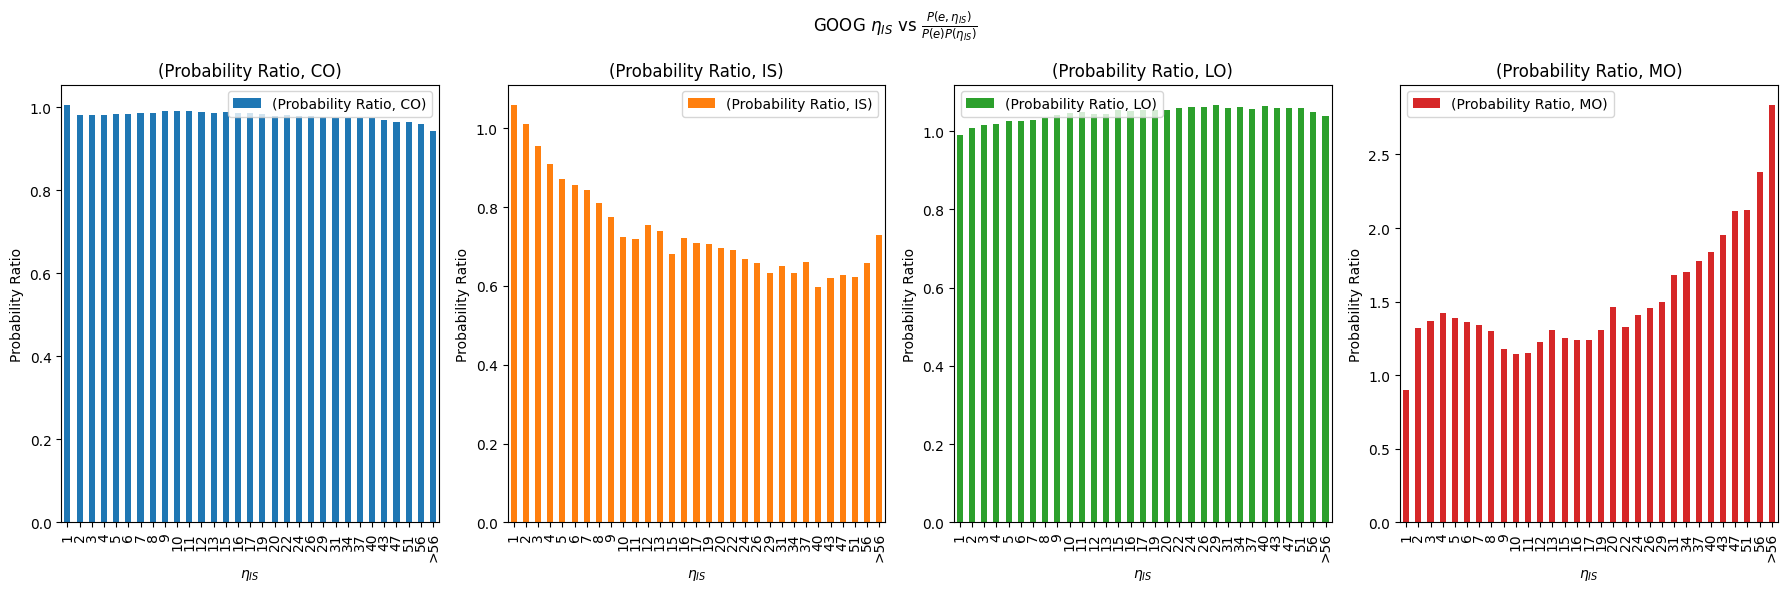

<Figure size 640x480 with 0 Axes>

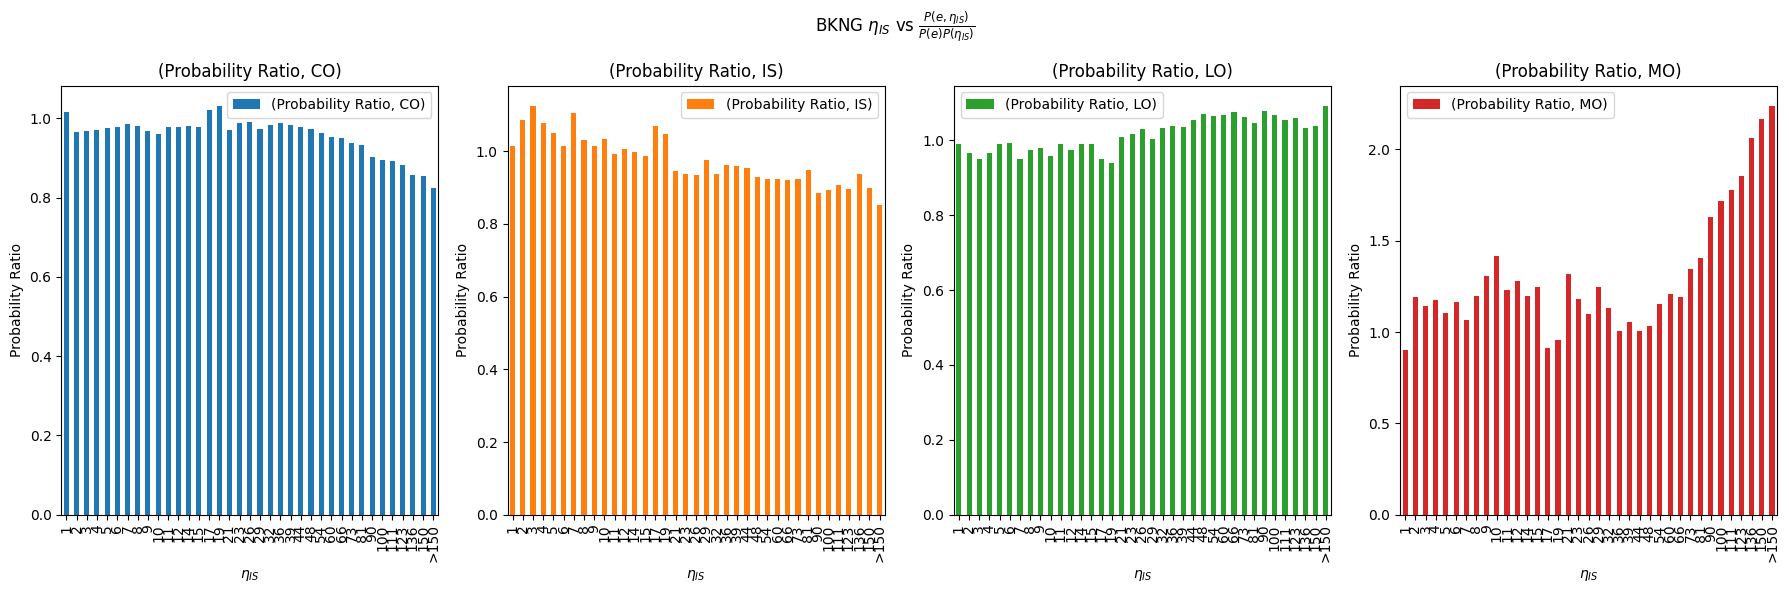

In [123]:
orderDict = {10:'LO', 11:'IS', 30: 'CO', 40:'MO'}
for s in stocks:
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_assumptions", 'rb') as f:
            res = pickle.load(f)
    except:
        continue
    uncond = res['uncondCounts_eta_is'].reset_index()
    uncond['Type'] = uncond['Type_eta_is'].apply(lambda x: orderDict[int(x[:2])])
    uncond['eta_is'] = uncond['Type_eta_is'].apply(lambda x: np.abs(int(x[2:])))
    #raw = uncond.groupby('eta_is')['Time'].sum()/uncond['Time'].sum()
    #raw['cat'] = raw['eta_is'].apply(lambda x: categories[np.searchsorted(categories, x)])
    #raw = raw.groupby('cat')['Time'].sum()
    uncond['Time'] = uncond['Time']/uncond['Time'].sum()
    df = res['uncondCounts_eta_is']/res['uncondCounts_eta_is'].sum()
    df = df[df>1e-4].reset_index()
    df['eta_is'] = df['Type_eta_is'].apply(lambda x: 1+int(x[2:]))
    depthMax = df['eta_is'].max()
    depthMin = df['eta_is'].min()
    categories = np.logspace(np.log(depthMin)/np.log(10),np.log(depthMax)/np.log(10), 50) #np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
    categories =np.unique(categories.astype(int))
    #categories = np.arange(1,40,5)
    cat_names = np.append(categories, ['>'+str(categories[-1])]) #['<=1','(1,100]','(100,200]','(200,500]','(500,1000]', '(1000,2000]', '>2000']
    uncond['cat'] = uncond['eta_is'].apply(lambda x: cat_names[np.searchsorted(categories, x)])
    uncond = ((uncond.groupby(['Type','cat'])['Time'].sum()/uncond.groupby(['Type'])['Time'].sum())/uncond.groupby(['cat'])['Time'].sum()).reset_index()
    uncond.columns = ['OrderType','$\\eta_{IS}$','Probability Ratio']
    df = uncond
    dfp = df.pivot_table(index='$\\eta_{IS}$', columns='OrderType', values=['Probability Ratio'], aggfunc='sum')
    dfp = dfp.reindex(index=cat_names)
    plt.figure()
    #plt.title(s + ' independence eta_is')
    dfp.plot(kind='bar', subplots=True, rot=90, figsize=(18, 6), layout=(1, 4), title= s + ' $\\eta_{IS}$ vs $\\frac{P(e, \\eta_{IS})}{P(e)P(\\eta_{IS})}$', ylabel = 'Probability Ratio')
    #plt.yscale('log')
    plt.tight_layout()
    plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_independence_eta_IS.png")

In [ ]:
orderDict = {10:'LO', 11:'IS', 30: 'CO', 40:'MO'}
for s in stocks:
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_assumptions", 'rb') as f:
            res = pickle.load(f)
    except:
        continue
    uncond = res['uncondCounts_q_LO'].reset_index()
    uncond['Type'] = uncond['Type_q_LO'].apply(lambda x: orderDict[int(x[:2])])
    uncond['q_LO'] = uncond['Type_q_LO'].apply(lambda x: np.abs(int(x[2:])))
    #raw = uncond.groupby('q_LO')['Time'].sum()/uncond['Time'].sum()
    #raw['cat'] = raw['q_LO'].apply(lambda x: categories[np.searchsorted(categories, x)])
    #raw = raw.groupby('cat')['Time'].sum()
    uncond['Time'] = uncond['Time']/uncond['Time'].sum()
    df = res['uncondCounts_q_LO']/res['uncondCounts_q_LO'].sum()
    df = df[df>1e-4].reset_index()
    df['q_LO'] = df['Type_q_LO'].apply(lambda x: 1+int(x[2:]))
    depthMax = df['q_LO'].max()
    depthMin = df['q_LO'].min()
    categories = np.logspace(np.log(depthMin)/np.log(10),np.log(depthMax)/np.log(10), 50) #np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
    categories =np.unique(categories.astype(int))
    #categories = np.arange(1,40,5)
    cat_names = np.append(categories, ['>'+str(categories[-1])]) #['<=1','(1,100]','(100,200]','(200,500]','(500,1000]', '(1000,2000]', '>2000']
    uncond['cat'] = uncond['q_LO'].apply(lambda x: cat_names[np.searchsorted(categories, x)])
    uncond = ((uncond.groupby(['Type','cat'])['Time'].sum()/uncond.groupby(['Type'])['Time'].sum())/uncond.groupby(['cat'])['Time'].sum()).reset_index()
    uncond.columns = ['OrderType','$\\kappa_{LO}$','Probability Ratio']
    df = uncond
    dfp = df.pivot_table(index='$\\kappa_{LO}$', columns='OrderType', values=['Probability Ratio'], aggfunc='sum')
    dfp = dfp.reindex(index=cat_names)
    plt.figure()
    #plt.title(s + ' independence q_LO')
    dfp.plot(kind='bar', subplots=True, rot=90, figsize=(18, 6), layout=(1, 4), title= s + ' $\\kappa_{LO}$ vs $\\frac{P(e, \\kappa_{LO})}{P(e)P(\\kappa_{LO})}$', ylabel = 'Probability Ratio')
    #plt.yscale('log')
    plt.tight_layout()
    plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_independence_q_LO.png")

In [ ]:
orderDict = {10:'LO', 11:'IS', 30: 'CO', 40:'MO'}
for s in stocks:
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_assumptions", 'rb') as f:
            res = pickle.load(f)
    except:
        continue
    uncond = res['uncondCounts_q_MO'].reset_index()
    uncond['Type'] = uncond['Type_q_MO'].apply(lambda x: orderDict[int(x[:2])])
    uncond['q_MO'] = uncond['Type_q_MO'].apply(lambda x: np.abs(int(x[2:])))
    #raw = uncond.groupby('q_MO')['Time'].sum()/uncond['Time'].sum()
    #raw['cat'] = raw['q_MO'].apply(lambda x: categories[np.searchsorted(categories, x)])
    #raw = raw.groupby('cat')['Time'].sum()
    uncond['Time'] = uncond['Time']/uncond['Time'].sum()
    df = res['uncondCounts_q_MO']/res['uncondCounts_q_MO'].sum()
    df = df[df>1e-4].reset_index()
    df['q_MO'] = df['Type_q_MO'].apply(lambda x: 1+int(x[2:]))
    depthMax = df['q_MO'].max()
    depthMin = df['q_MO'].min()
    categories = np.logspace(np.log(depthMin)/np.log(10),np.log(depthMax)/np.log(10), 50) #np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
    categories =np.unique(categories.astype(int))
    #categories = np.arange(1,40,5)
    cat_names = np.append(categories, ['>'+str(categories[-1])]) #['<=1','(1,100]','(100,200]','(200,500]','(500,1000]', '(1000,2000]', '>2000']
    uncond['cat'] = uncond['q_MO'].apply(lambda x: cat_names[np.searchsorted(categories, x)])
    uncond = ((uncond.groupby(['Type','cat'])['Time'].sum()/uncond.groupby(['Type'])['Time'].sum())/uncond.groupby(['cat'])['Time'].sum()).reset_index()
    uncond.columns = ['OrderType','$\\kappa_{MO}$','Probability Ratio']
    df = uncond
    dfp = df.pivot_table(index='$\\kappa_{MO}$', columns='OrderType', values=['Probability Ratio'], aggfunc='sum')
    dfp = dfp.reindex(index=cat_names)
    plt.figure()
    #plt.title(s + ' independence q_MO')
    dfp.plot(kind='bar', subplots=True, rot=90, figsize=(18, 6), layout=(1, 4), title= s + ' $\\kappa_{MO}$ vs $\\frac{P(e, \\kappa_{MO})}{P(e)P(\\kappa_{MO})}$', ylabel = 'Probability Ratio')
    #plt.yscale('log')
    plt.tight_layout()
    plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_independence_q_MO.png")

## Leverage plots

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 22 24 26 28 30
 32 35 38 40]


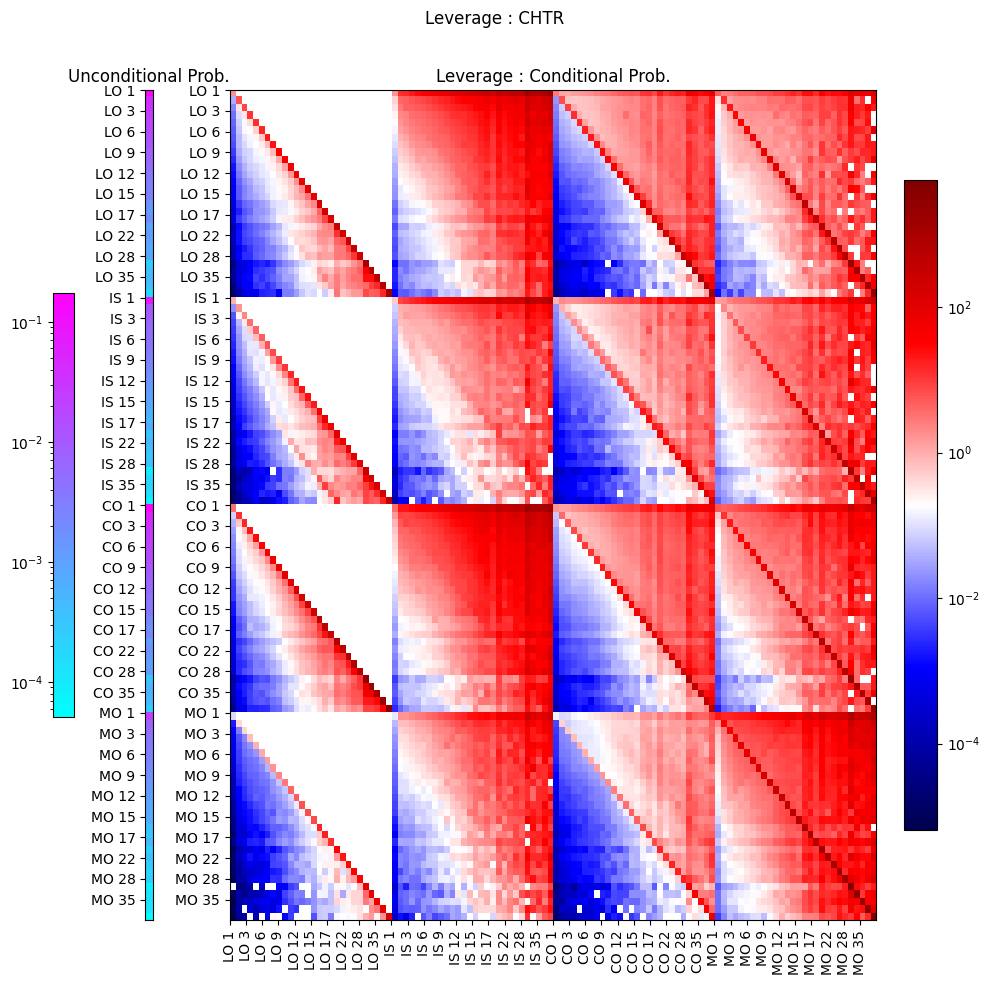

In [99]:
for s in ['CHTR']:
        with open('/SAN/fca/Konark_PhD_Experiments/smallTick/'+s+'_EDA_assumptions', 'rb') as f:
            dict_res = pickle.load(f)
        condCounts, uncondCounts = dict_res['condCounts_mT'], dict_res['uncondCounts_mT']
        df = uncondCounts/uncondCounts.sum()
        df = df[df>1e-4].reset_index()
        df['mT'] = df['Type_mT'].apply(lambda x: int(x[2:]))
        depthMax = df['mT'].max()
        depthMin = df['mT'].min()
        categories = np.logspace(np.log(depthMin)/np.log(10),np.log(depthMax)/np.log(10), 50) #np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
        categories =np.unique(categories.astype(int))
        print(categories)
        condCounts_categorized = condCounts.reset_index().copy()
        condCounts_categorized['cat'] = condCounts_categorized['Type_mT'].apply(lambda x : x[:2]+ str( np.searchsorted(categories, np.abs(int(x[2:])))))
        condCounts_categorized['cat_1'] = condCounts_categorized['Type_mT_1'].apply(lambda x : x[:2]+ str( np.searchsorted(categories, np.abs(int(x[2:])))))
        uncondCounts_categorized = uncondCounts.reset_index().copy()
        uncondCounts_categorized['cat'] = uncondCounts_categorized['Type_mT'].apply(lambda x : x[:2]+ str( np.searchsorted(categories, np.abs(int(x[2:])))))
        condCounts_categorized = condCounts_categorized.groupby(['cat','cat_1'])['Time'].sum()
        uncondCounts_categorized = uncondCounts_categorized.groupby('cat')['Time'].sum()
        condProb_categorized = condCounts_categorized/uncondCounts_categorized
        uncondProb_categorized = uncondCounts_categorized/uncondCounts_categorized.sum()
        leverage_categorized = condProb_categorized/uncondProb_categorized
        leverage_categorized = leverage_categorized.reset_index()
        leverage_categorized[['Type','cat']]= np.stack(leverage_categorized['cat'].apply(lambda x: np.array([int(x[:2]) , int(x[2:])])).values)
        leverage_categorized[['Type_1','cat_1']]= np.stack(leverage_categorized['cat_1'].apply(lambda x: np.array([int(x[:2]) , int(x[2:])])).values)
        # depthMax = int(np.max(leverage_categorized.Depth.apply(np.abs)))
        leverage_categorized = leverage_categorized.set_index(['Type_1','cat_1','Type', 'cat'])
        matrix = np.zeros((int(len(categories)*4), int(len(categories)*4)))
        converter ={  0: 10, 1:11, 2: 30,  3: 40}
        for i in range(int(len(categories)*4)):
            type_i = converter[i//len(categories)]
            depth_i = i%len(categories)
            for j in range(len(categories)*4):
                type_j = converter[j//len(categories)]
                depth_j =j%len(categories)
                if (int(type_i), int(depth_i), int(type_j), int(depth_j)) in leverage_categorized.index:
                    matrix[i, j] = leverage_categorized.loc[(int(type_i), int(depth_i), int(type_j), int(depth_j))]['Time']
    
        fig, axs = plt.subplots(1, 2, figsize=(10,10), gridspec_kw={'width_ratios': [1, 5]})
        im = axs[1].imshow(matrix,norm='log', cmap='seismic', aspect="auto")
        plt.colorbar(im, fraction=0.046, pad=0.04)
        locs = np.linspace(0, len(matrix), num = 41)
        labels = []
        for x, y in zip( np.array(["LO"]*10 + ['IS']*10 + ["CO"]*10 + ["MO"]*10) , np.array([" " + str(int(x)) for x in np.array(list(categories)*4)[[int(x) for x in (locs[:-1])]]])):
            labels.append(x+y)
        axs[1].set_xticks(ticks = -0.5+locs[:-1], labels = labels, rotation=90)
        axs[1].set_yticks(ticks = -0.5+locs[:-1] ,labels = labels)
        df = uncondProb_categorized.reset_index()
        df['Type'] = df['cat'].apply(lambda x: int(x[:2]))
        df['Depth'] = df['cat'].apply(lambda x: int(x[2:]))
        df = df.sort_values(['Type','Depth'])
        df = df.set_index(['Type','Depth'])
        mat = np.zeros(len(categories)*4)
        for i in range(int(len(categories)*4)):
            type_i = converter[i//len(categories)]
            depth_i = i%len(categories)
            if (int(type_i), int(depth_i)) in df.index:
                mat[i] = df.loc[(int(type_i), int(depth_i))]['Time']
        im2 = axs[0].imshow(1e-7+mat.reshape((len(mat), 1)), norm='log', cmap = 'cool')
        plt.colorbar(im2, location='left', pad=0.5)
        axs[0].set_xticks(ticks = [])
        axs[0].set_yticks(ticks = -0.5+locs[:-1] ,labels = labels)
        fig.tight_layout()
        axs[0].set_title('Unconditional Prob.')
        axs[1].set_title('Leverage : Conditional Prob.')
        fig.suptitle('Leverage : '+s)
        fig.subplots_adjust(top=0.9)
        #plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_leverage_truetop.png")

In [126]:
res['perSecDF']

q_LO    q_MO    eta_is    Time
sec   Type TradeDirection                                   
34200 1    -1               3934.0     NaN       0.0  3296.0
            1               4502.0     NaN  105604.5  3370.0
      3    -1                  NaN     NaN       NaN   309.0
            1                  NaN     NaN       NaN   363.0
      4    -1                  NaN  2205.0       NaN   337.0
...                            ...     ...       ...     ...
57599 1     1              26813.0     NaN    3438.0  4706.0
      3    -1                  NaN     NaN       NaN  2129.0
            1                  NaN     NaN       NaN  2694.0
      4    -1                  NaN  7876.0       NaN   867.0
            1                  NaN  8043.0       NaN   760.0

[139822 rows x 4 columns]

## LB Test for iid

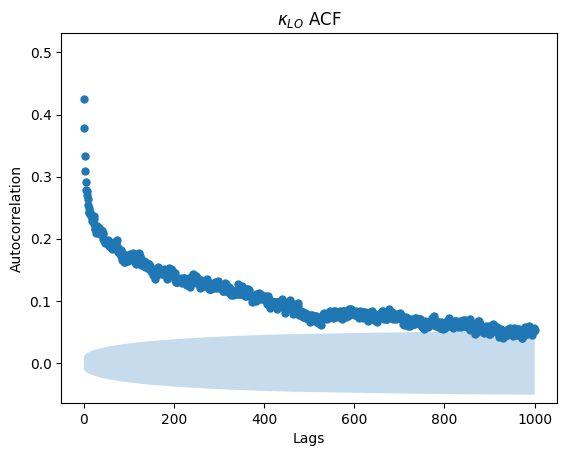

In [88]:
sm.graphics.tsa.plot_acf(np.log(data['q_LO'].dropna().values), lags=1000, zero=False, use_vlines = False,auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('$\\kappa_{LO}$ ACF')
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/CHTR_q_LO_acf.png")

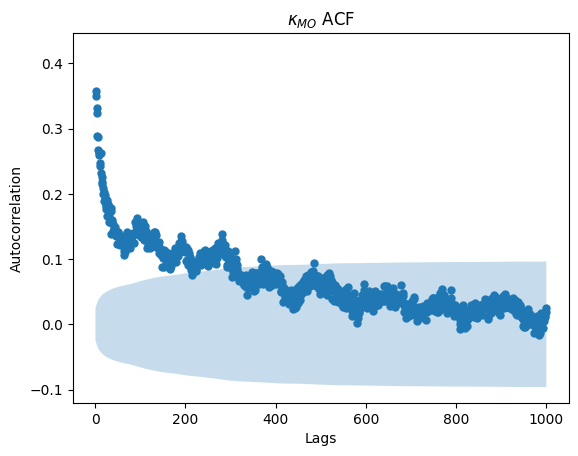

In [89]:
sm.graphics.tsa.plot_acf(np.log(data['q_MO'].dropna().values), lags=1000, zero=False, use_vlines = False,auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('$\\kappa_{MO}$ ACF')
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/CHTR_q_MO_acf.png")
plt.show()

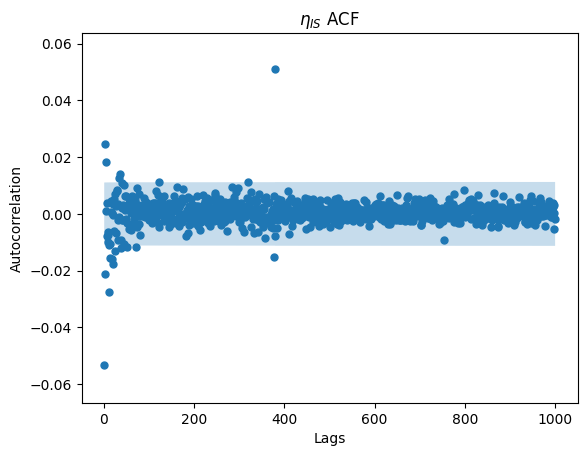

In [90]:
sm.graphics.tsa.plot_acf(data['eta_is'].dropna().values, lags=1000, zero=False, use_vlines = False,auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('$\\eta_{IS}$ ACF')
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/CHTR_eta_IS_acf.png")
plt.show()

In [53]:
with open('/SAN/fca/Konark_PhD_Experiments/simulated/smallTick/demo_tickness_avgSpr_beta_0.5_0.55', 'rb') as f:
    sim = pickle.load(f)

In [64]:
simDf = pd.DataFrame(sim[1])

In [65]:
simDf['e'] = np.append([''] , np.array(sim[0][1:])[:,0])

In [66]:
simDf['q_LO']

,mid,Ask_touch,Bid_touch,Ask_m_T,Ask_m_D,Bid_m_T,Bid_m_D,Ask_deep,Bid_deep,e
0,1700.00,"(1700.55, 2)","(1699.45, 10)",11.0,3.0,10.0,1.0,"(1700.6599999999999, 168)","(1699.3500000000001, 36)",
1,1699.95,"(1700.55, 2)","(1699.35, 36.0)",11.0,3.0,1.0,1.0,"(1700.66, 168)","(1699.34, 36)",co_top_Bid
2,1699.96,"(1700.55, 2)","(1699.36, 32)",11.0,3.0,1.0,1.0,"(1700.66, 168)","(1699.35, 36.0)",lo_inspread_Bid
3,1699.96,"(1700.55, 2)","(1699.37, 9)",11.0,3.0,1.0,1.0,"(1700.66, 168)","(1699.36, 32.0)",lo_inspread_Bid
4,1699.96,"(1700.55, 2)","(1699.38, 40)",11.0,3.0,1.0,1.0,"(1700.66, 168)","(1699.37, 9.0)",lo_inspread_Bid
...,...,...,...,...,...,...,...,...,...,...
313995,1696.72,"(1696.76, 69.0)","(1696.67, 190.0)",1.0,25.0,1.0,28.0,"(1696.77, 3788.0)","(1696.66, 5371.0)",co_deep_Ask
313996,1696.72,"(1696.76, 69.0)","(1696.67, 190.0)",1.0,25.0,1.0,28.0,"(1696.77, 3787.0)","(1696.66, 5371.0)",co_deep_Ask
313997,1696.72,"(1696.76, 80.0)","(1696.67, 190.0)",1.0,25.0,1.0,28.0,"(1696.77, 3787.0)","(1696.66, 5371.0)",lo_top_Ask
313998,1696.71,"(1696.75, 15)","(1696.67, 190.0)",1.0,26.0,1.0,28.0,"(1696.76, 3867.0)","(1696.66, 5371.0)",lo_inspread_Ask


In [69]:
simDf['q_LO'] =simDf['Ask_touch'].apply(lambda x: x[1]).diff()

(array([5.389e+03, 1.597e+03, 7.170e+02, 1.398e+03, 6.580e+02, 1.610e+03,
        1.106e+03, 4.580e+02, 8.510e+02, 3.930e+02, 7.660e+02, 7.000e+02,
        2.770e+02, 5.710e+02, 2.830e+02, 4.870e+02, 4.250e+02, 2.030e+02,
        3.760e+02, 1.980e+02, 3.060e+02, 1.620e+02, 2.690e+02, 2.490e+02,
        1.060e+02, 2.030e+02, 8.300e+01, 1.840e+02, 1.690e+02, 7.000e+01,
        5.150e+02, 6.200e+01, 8.700e+01, 1.130e+02, 5.200e+01, 9.900e+01,
        4.100e+01, 6.500e+01, 7.800e+01, 2.900e+01, 4.900e+01, 2.200e+01,
        5.000e+01, 1.600e+01, 3.400e+01, 3.200e+01, 1.600e+01, 2.700e+01,
        1.200e+01, 2.900e+01, 2.600e+01, 9.000e+00, 1.800e+01, 1.000e+01,
        2.400e+01, 1.600e+01, 5.000e+00, 1.800e+01, 2.000e+00, 6.000e+00,
        5.000e+00, 7.000e+00, 8.051e+03, 3.000e+00, 8.000e+00, 3.000e+00,
        5.000e+00, 8.000e+00, 3.000e+00, 8.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 2.000e+0

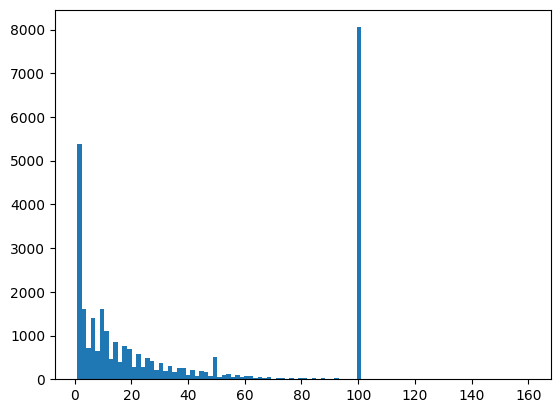

In [77]:
plt.hist(simDf.loc[(simDf.e == 'lo_top_Ask')&(simDf.q_LO > 0 )]['q_LO'].values, bins =100)

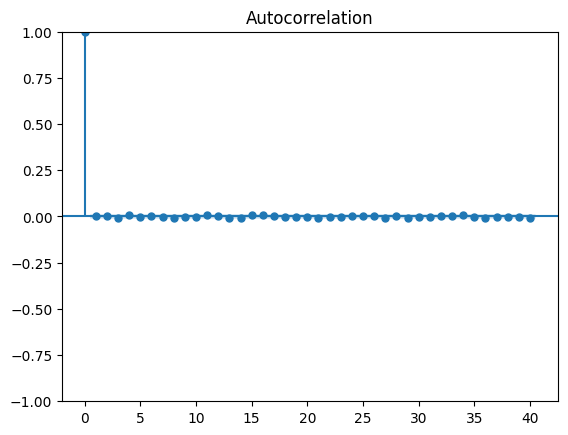

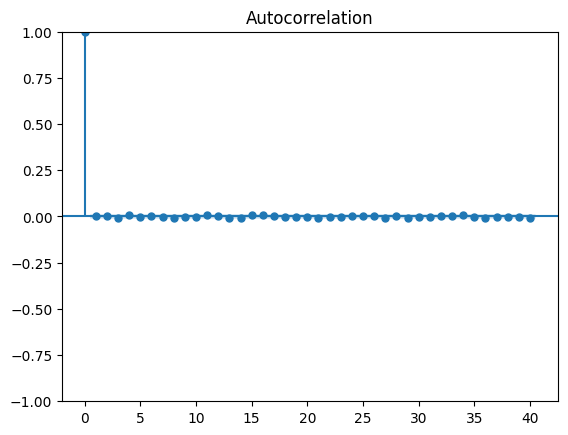

In [76]:
sm.graphics.tsa.plot_acf(np.log(simDf.loc[(simDf.e == 'lo_top_Ask')&(simDf.q_LO > 0 )]['q_LO'].values), lags=40)

## Intensity vs state variables boxplots

In [ ]:
for s in ['AMZN']:
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_persecDF", 'rb') as f:
            res = pickle.load(f)
    except:
        continue
    

In [132]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_ParamsInferredWCutoff_2019-01-02_2019-03-31_poisson", "rb") as f:
        data=pickle.load(f)

In [4]:
res = pd.read_csv("D:\\PhD\\results - small tick\\AMZN_EDA_persecDF.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_27956\751364955.py:1: SyntaxWarning: invalid escape sequence '\P'
  res = pd.read_csv("D:\PhD\\results - small tick\AMZN_EDA_persecDF.csv")


In [39]:
res.tail()

,sec,Type,TradeDirection,q_LO,q_MO,eta_is,m_T_Ask,m_T_Bid,m_D_Ask,m_D_Bid,Time
79300,23399,1,1,"[64.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",[],"[3.999999999996362, 0.0, 9.000000000014552, 10...","[4.0, 12.0, 2.0, 4.0, 2.0, 10.0, 4.0, 3.0, 6.0...","[7.000000000000001, 7.000000000000001, 24.0, 1...","[0.0, 25.0, 13.5, 6.0, 17.0, 24.0, 3.0, 1.0, 2...","[15.0, 24.0, 19.0, 19.0, 7.000000000000001, 26...","[37, 21, 26, 37, 27, 31, 37, 48, 25, 33, 37, 4..."
79301,23399,3,-1,[],[],"[10.000000000013642, -21.500000000003183, 47.4...","[5.0, 9.0, 1.0, 5.5, 6.0, 10.0, 5.0, 12.0, 14....","[10.0, 7.000000000000001, 21.0, 8.0, 2.0, 1.0,...","[0.0, 36.0, 13.0, 5.5, 17.0, 28.99999999999999...","[17.0, 12.0, 14.000000000000002, 8.0, 20.0, 11...","[1, 21, 9, 22, 7, 9, 8, 8, 10, 9, 7, 6, 30, 13..."
79302,23399,3,1,[],[],"[3.999999999996362, 0.0, 23.00000000000182, 8....","[4.0, 12.0, 2.0, 1.5, 2.0, 10.0, 9.0, 3.0, 6.0...","[7.000000000000001, 21.0, 8.5, 8.0, 3.0, 5.0, ...","[4.0, 14.000000000000002, 13.0, 7.000000000000...","[8.0, 20.0, 14.5, 19.0, 7.000000000000001, 10....","[24, 24, 12, 20, 13, 23, 9, 23, 20, 27, 8, 34,..."
79303,23399,4,-1,[],"[4.0, 86.5, 68.5, 100.0, 100.0, 4.0, 50.0, 5.0...","[1.999999999998181, -0.49999999999954525, 12.9...","[10.0, 4.0, 2.0, 5.0, 2.0, 6.0, 4.5, 8.0, 6.0,...","[7.000000000000001, 7.000000000000001, 9.0, 11...","[4.0, 42.5, 7.000000000000001, 7.0000000000000...","[8.0, 16.0, 1.0, 9.0, 7.000000000000001, 0.0, ...","[17, 22, 24, 52, 7, 21, 26, 44, 21, 21, 43, 42..."
79304,23399,4,1,[],"[100.0, 78.5, 100.0, 8.5, 4.5, 87.0, 38.5, 49....","[10.500000000001819, 0.49999999999954525, 59.4...","[10.0, 12.0, 6.0, 2.0, 2.0, 10.0, 4.0, 3.0, 6....","[4.0, 6.0, 11.0, 8.0, 76.0, 3.0, 16.0, 16.0, 6...","[35.0, 28.999999999999996, 15.0, 2.0, 16.0, 24...","[10.0, 22.0, 19.0, 8.5, 7.000000000000001, 11....","[31, 12, 7, 26, 20, 45, 26, 29, 11, 10, 3, 47,..."


In [40]:
res_lo = res.loc[(res['Type']==4)&(res['TradeDirection']==1)&(res['sec'] < 23400 - 3600)&(res['sec'] > 3600)]

In [41]:
m_T = np.hstack([eval(x) for x in res_lo['m_T_Ask'].values])
intensity = np.hstack([eval(x) for x in res_lo['Time'].values])

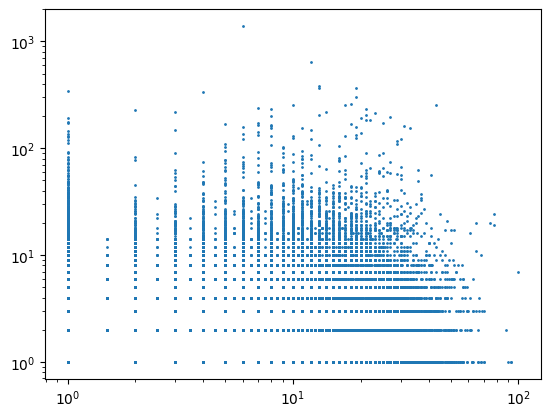

In [42]:
plt.scatter(m_T, intensity, s=1)
plt.xscale('log')
plt.yscale('log')

<Axes: xlabel='m_T'>

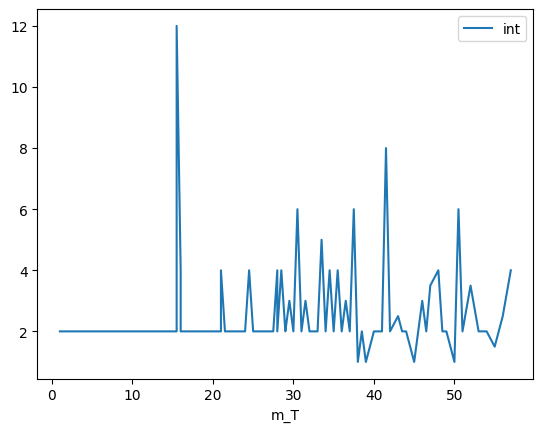

In [43]:
df = pd.DataFrame({'m_T':m_T,'int': intensity}).groupby('m_T').count()
df = df/df.sum()
m_Tmax = np.max(df[df['int']>1e-4].index)
df = pd.DataFrame({'m_T':m_T,'int': intensity})
df = df.loc[df.m_T <= m_Tmax ]
df.groupby('m_T').median().plot()

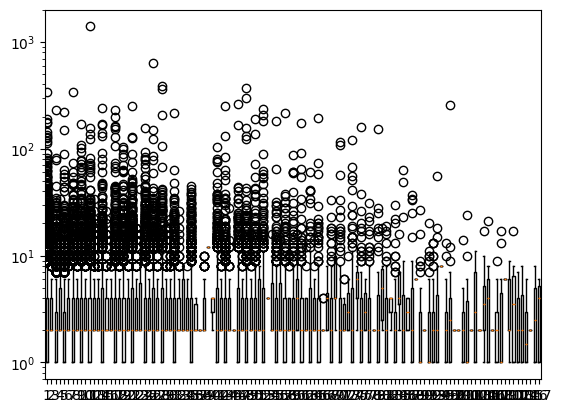

In [44]:
plt.boxplot(df.groupby('m_T')['int'].apply(np.array))
plt.yscale('log')

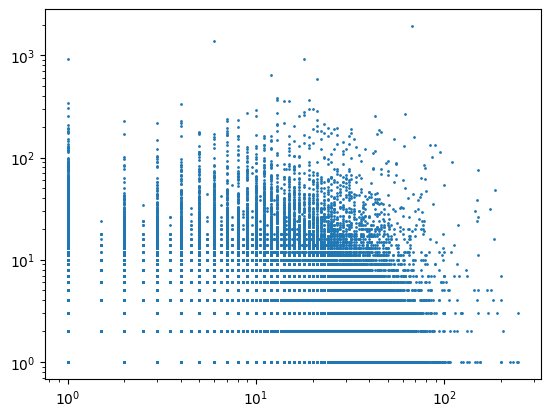

In [37]:
m_T_a = np.hstack([eval(x) for x in res_lo['m_T_Ask'].values])
plt.scatter(m_T_a, intensity, s=1)
plt.xscale('log')
plt.yscale('log')